## **Exploratory Data Analysis (EDA)**

In this section, we will perform a comprehensive exploration of the dataset to uncover underlying patterns, relationships, and trends. The goal is to gain insights into the key factors influencing employee behavior and attrition.


In [1]:
 # Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [3]:
 # Loading the Dataset 
DATA = pd.read_csv( 'HR_Employee_Attrition.csv' )

In [4]:
 # Getting the statistical summary
display( DATA.describe() . T )

display( DATA.describe( include = 'object') . T )

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


### **Descriptive Statistics Summary**

#### **Numerical Features:**

* The **average age** of employees is **36.92 years**, with a range from **18 to 60 years**.
* The **mean hourly rate** is **\$65.89**, with values ranging from **\$30 to \$100**.
* The **average percentage salary hike** is **15.29%**, with the minimum at **3.6%** and the maximum at **25%**.
* The **mean monthly income** is **\$6,502**, ranging from **\$1,009 to \$19,999**.
* The **average job satisfaction rating** is **2.78**, on a scale of **1 to 4**.
* The **average work-life balance rating** is **2.76**, also on a **1 to 4 scale**.

#### **Categorical Features:**

* Out of 1,470 employees, **1,233 have not left** the company, indicating that the **Attrition** variable is imbalanced.
* The majority of employees **travel rarely** for business.
* The **Research & Development department** has the highest number of employees, with **961 staff members**.
* The dataset shows a **majority of male employees**.
* **Most employees are married**.
* **All employees are over the age of 18**.
* The majority of employees **do not work overtime**.


### **Categorical - Categorical Analysis**

In [17]:
 # Creating Function 

def plots ( data , column ):
    
    uniq = data[column].nunique()
    count = data[column].value_counts()
    perc = (count / count.sum())*100
    
    if uniq == 3 :

        # Plot the counts as a bar plot
        fig , ax = plt.subplots( 1 , 2 ,figsize = ( 20, 6))
        count.plot( kind = 'bar' , stacked = False , ax = ax[0]  )

        ax[0].set_title('EMPLOYEE ' + column.upper() + ' COUNT', fontweight='bold'  )
        ax[0].set_xlabel(column, fontweight='bold')
        ax[0].set_ylabel('Count', fontweight='bold')

         # Pie chart
        ax[1].pie(perc, labels=perc.index, autopct='%1.1f%%',  startangle=90 , colors = ['#3B5B8A', '#A3C4EB' , '#FFDE70'] )
        ax[1].set_title('EMPLOYEE ' + column.upper() + ' PERCENTAGE', fontweight='bold')
    

        return plt.show
    
    elif uniq < 3 :
         # Plot the counts as a bar plot
        fig , ax = plt.subplots( 1 , 2 ,figsize = ( 20, 6))
        count.plot( kind = 'bar' , stacked = False , ax = ax[0]  )

        ax[0].set_title('EMPLOYEE ' + column.upper() + ' COUNT', fontweight='bold' )
        ax[0].set_xlabel(column, fontweight='bold')
        ax[0].set_ylabel('Count', fontweight='bold')

         # Pie chart
        ax[1].pie(perc, labels=perc.index, autopct='%1.1f%%',  startangle=90 , colors = ['#3B5B8A', '#A3C4EB'] )
        ax[1].set_title('EMPLOYEE ' + column.upper() + ' PERCENTAGE', fontweight='bold')

        return plt.show 
    
    else:

        colors = ['#FF5733'] + ['#1f77b4'] * (uniq - 1)
        ax = count.plot( kind = 'bar' , figsize = ( 20 , 6) , color = colors  )

        # Add labels and title
        plt.title('EMPLOYEE ' + column.upper() + ' COUNT AND PERCENTAGE ', fontweight='bold')
        plt.xlabel(column , fontweight='bold')
        plt.ylabel('COUNT', fontweight='bold')
        plt.xticks(rotation=0)

        # Annotate the bars with percentages
        for i in range(len(count)):
            barval = count.iloc[i]
            percentage = perc.iloc[i]
            ax.text(i, barval + 0.5, f'{percentage:.2f}%', ha='center', fontweight='bold')


        return plt.show()
    

 # Categorical - Categorical Function
def cat_plot( data , var1 , var2 ):

    # Getting the contingency Table 
    ct = pd.crosstab( data[var1] , data[var2] )
    ct_per = pd.crosstab( data[var1] , data[var2] , normalize = 'index' ) * 100
    uniq = data[var2].nunique() # Getting no of unique values 
    display(ct)
    
    if uniq <= 3 :
        # Plotting the bar plot with the crosstab result
        fig , ax = plt.subplots(figsize = ( 20, 6 ))

        ct_per.plot(kind='bar', stacked=False, ax = ax )

        ax.set_title( var1.upper() + ' RATE BY ' +  var2.upper() , fontweight = 'bold')
        ax.set_ylabel( 'Rate' , fontweight = 'bold')
        ax.set_xlabel('Attrition' , fontweight = 'bold')

         # Annotating the bars 
        for p in ax.patches:
            height = p.get_height()
    
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),  
                        ha='center', va='bottom')  

        return plt.show()
    
    else :
         # plotting for more than 3 Categories
        fig , ax = plt.subplots( figsize = ( 20, 6 ))

        ct_per.plot(kind='bar', stacked=False, ax = ax)


        ax.set_title( var1.upper() + ' RATE BY ' +  var2.upper() , fontweight = 'bold')
        ax.set_ylabel( 'Rate' , fontweight = 'bold')
        ax.set_xlabel('Attrition' , fontweight = 'bold')

         # Annotating the bars 
        for p in ax.patches:
            height = p.get_height()
    
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),  
                        ha='center', va='bottom')  

        return plt.show()
    


<function matplotlib.pyplot.show(close=None, block=None)>

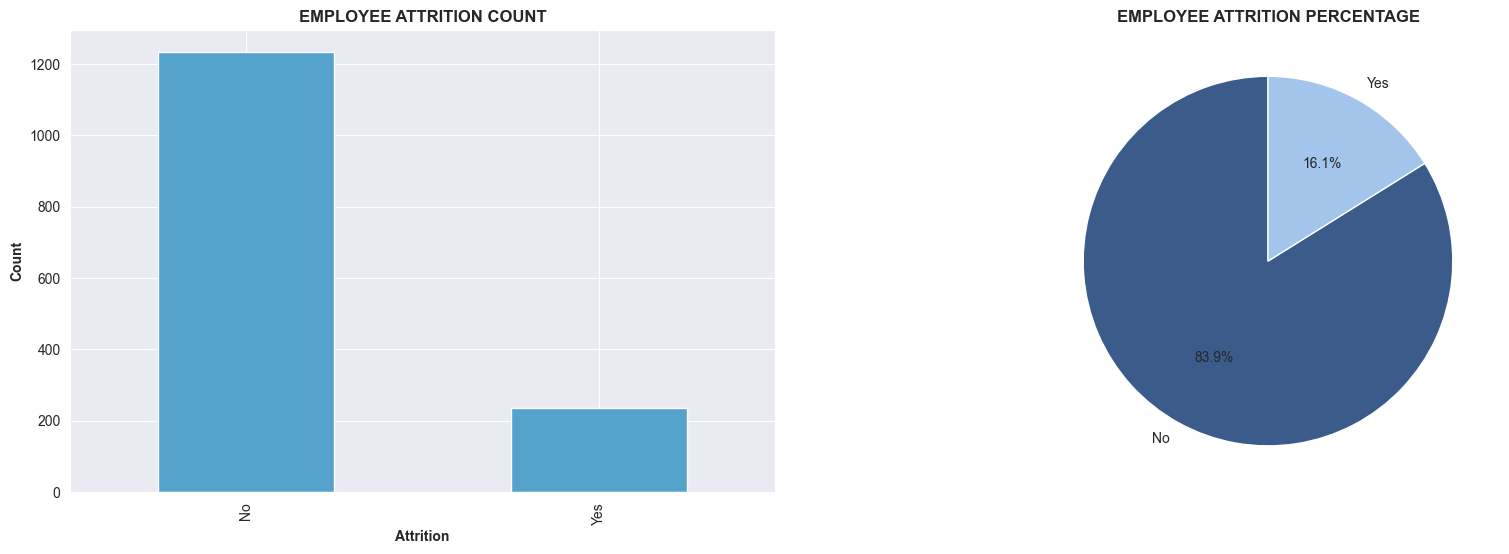

In [9]:
 # Plotting attrition rate and Count.
plots ( DATA , 'Attrition' )

The visualizations reveal that the majority of employees remain with the company, with only 16.1% having left. This indicates a relatively low attrition rate and confirms that the dataset is imbalanced.

Next, we will proceed with a bivariate analysis of categorical variables to explore potential relationships and patterns.

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


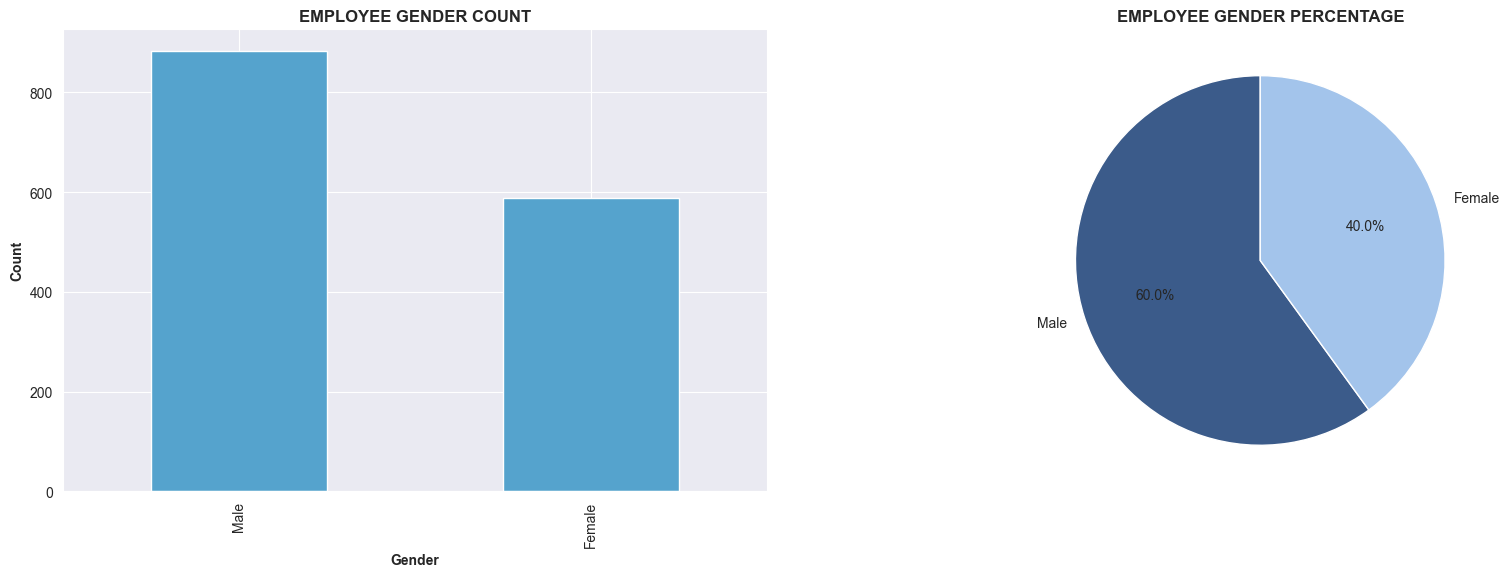

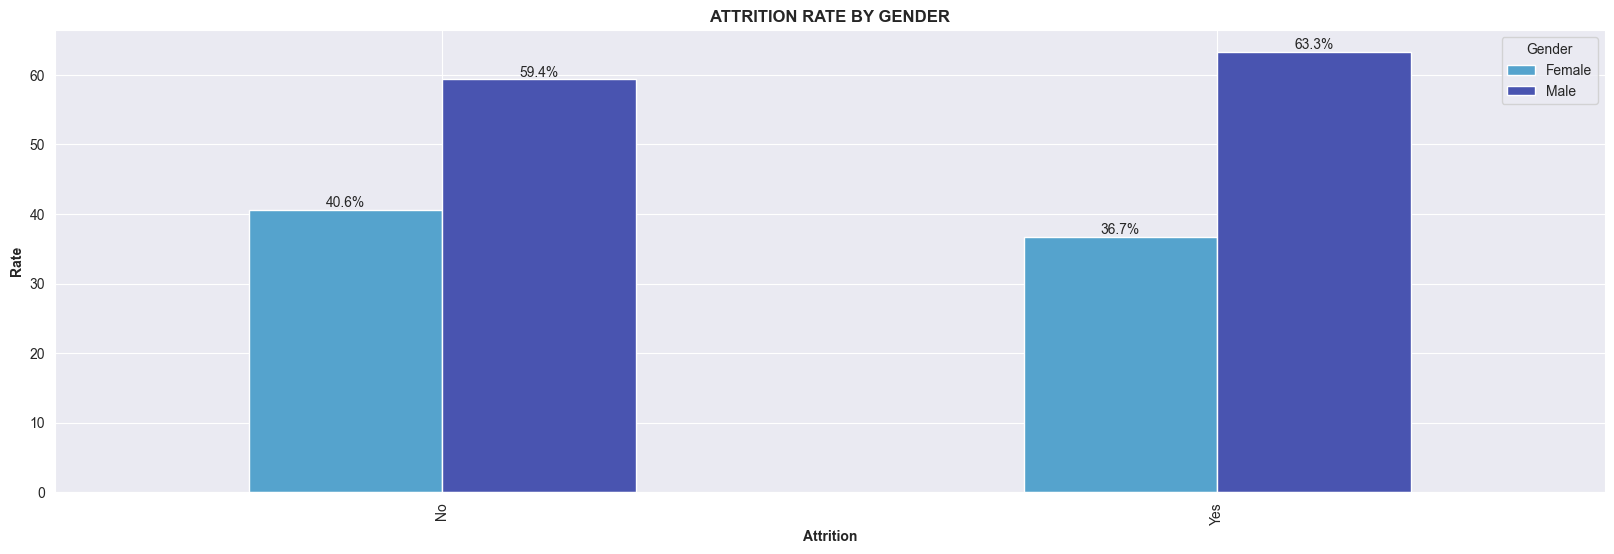

In [10]:
 # Visualizing Gender 
plots ( DATA , 'Gender' )

cat_plot( DATA , 'Attrition' , 'Gender' )


The gender distribution shows that approximately 60% of employees are male and 40% are female. Additionally, attrition appears to be higher among male employees, accounting for 63.3% of total attrition, compared to 36.7% for female employees.

This suggests that male employees are more likely to leave the organization than their female counterparts.

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


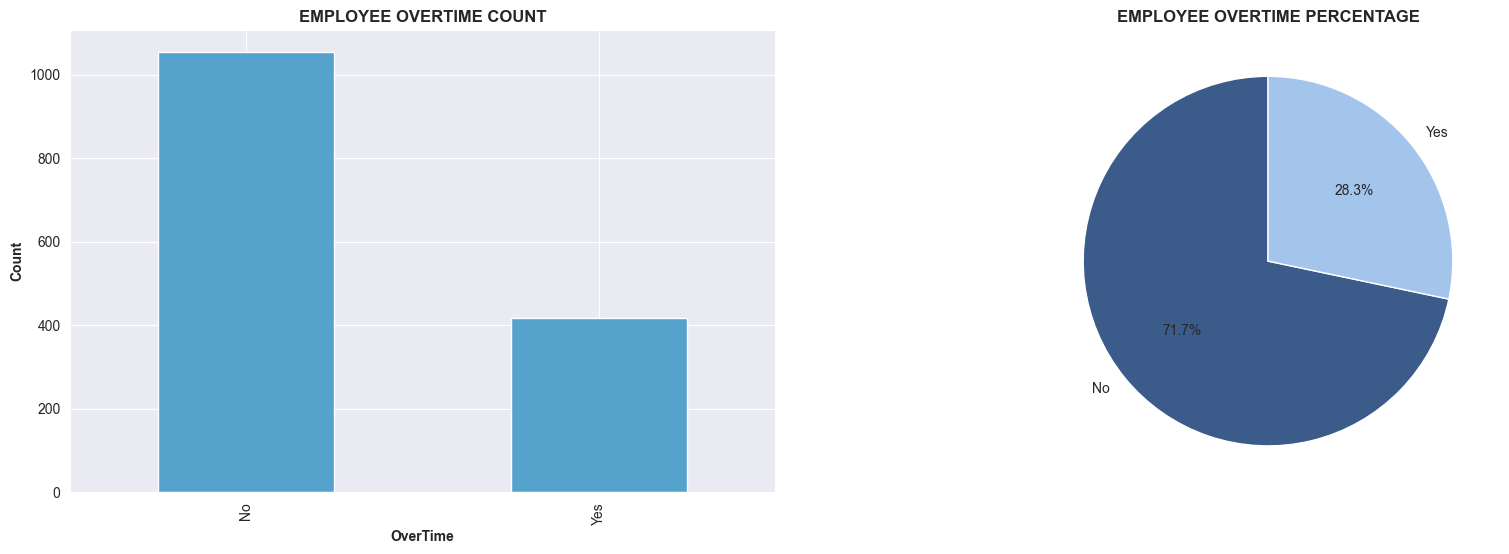

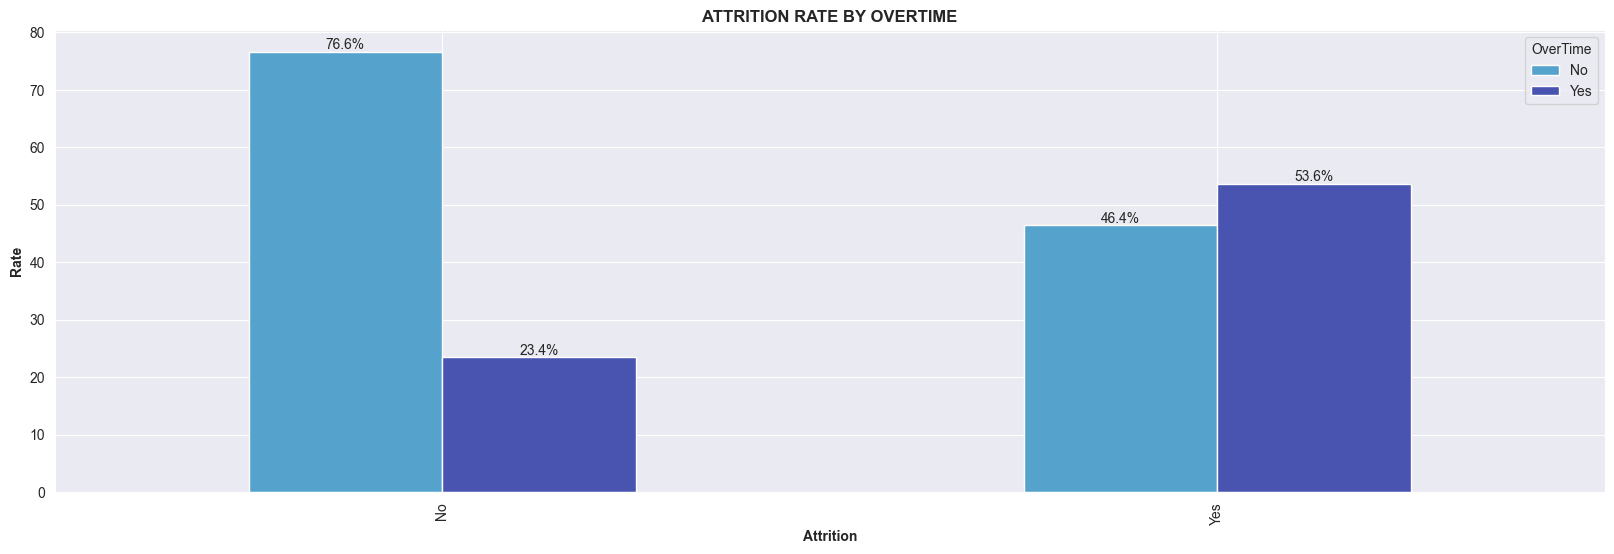

In [11]:
# plotting Overtime 
plots( DATA , 'OverTime' )
cat_plot( DATA , 'Attrition' , 'OverTime' )

The data indicates that the majority of employees do not work overtime, with only 28.3% reporting overtime hours.

However, employees who work overtime exhibit a notably higher attrition rate of 53.6%. In contrast, among those who work overtime, only 23.4% remain with the company, compared to 76.6% of employees who do not work overtime and continue their employment.

This suggests a potential link between working overtime and increased likelihood of attrition

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


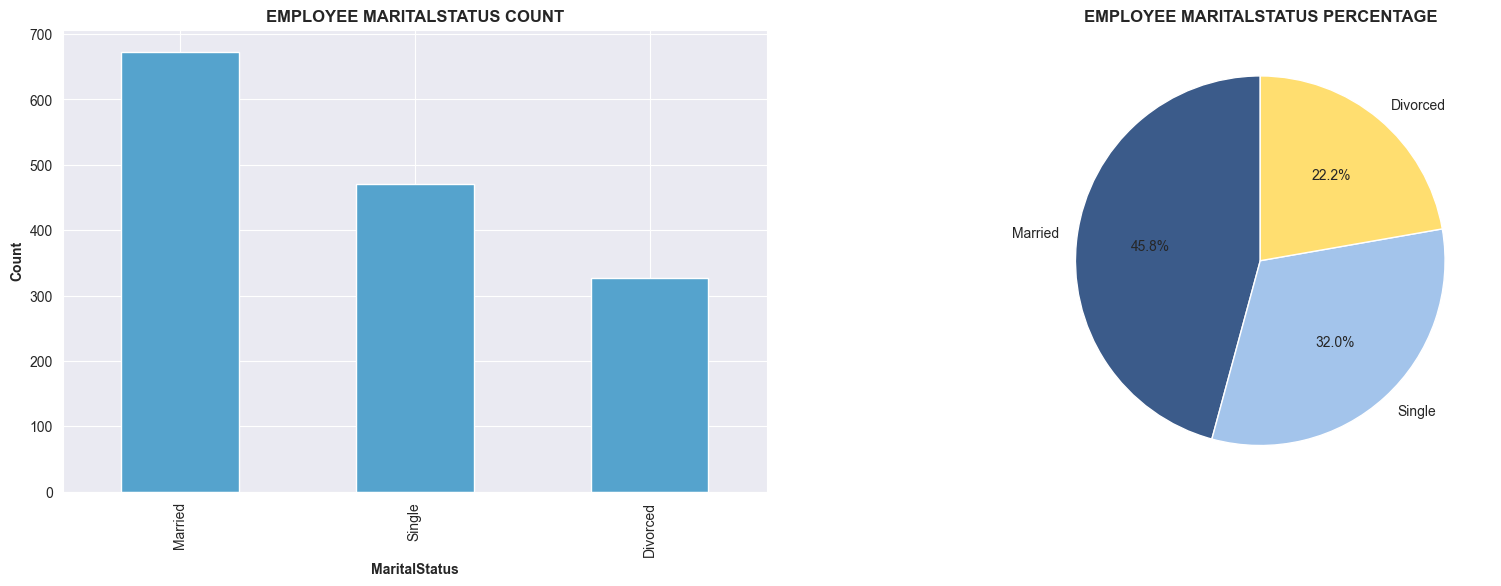

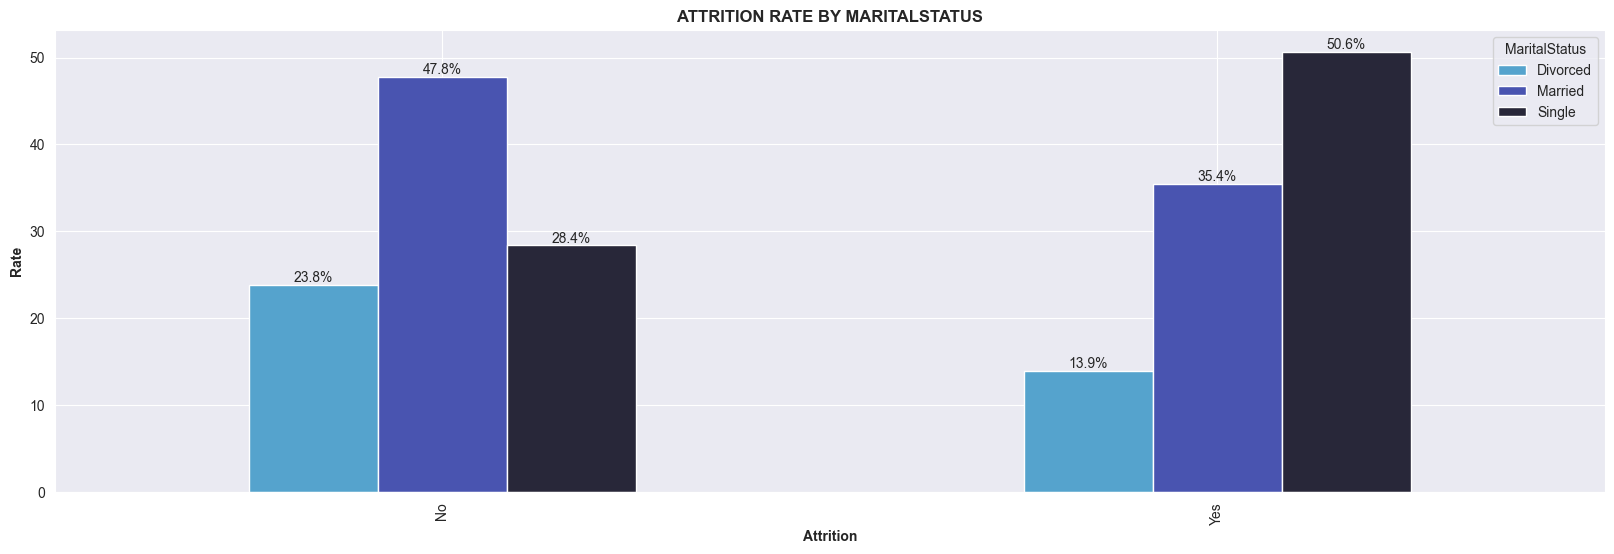

In [12]:
 # Plotting Marital Status
plots( DATA , 'MaritalStatus' )
cat_plot( DATA , 'Attrition' , 'MaritalStatus' )


The marital status distribution reveals that 45.8% of employees are married, 32.0% are single, and 22.2% are divorced.

Attrition is highest among single employees, who account for 50.6% of total attrition. Married employees exhibit a lower attrition rate at 35.4%, followed by divorced employees at 13.9%. Interestingly, divorced employees have the lowest attrition rate overall.

In terms of retention, 47.8% of married employees remain with the company, significantly higher than the 28.4% retention rate for single employees and 23.8% for divorced employees. This suggests that marital status may be associated with employee retention, with married employees showing a stronger likelihood of staying with the organization

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


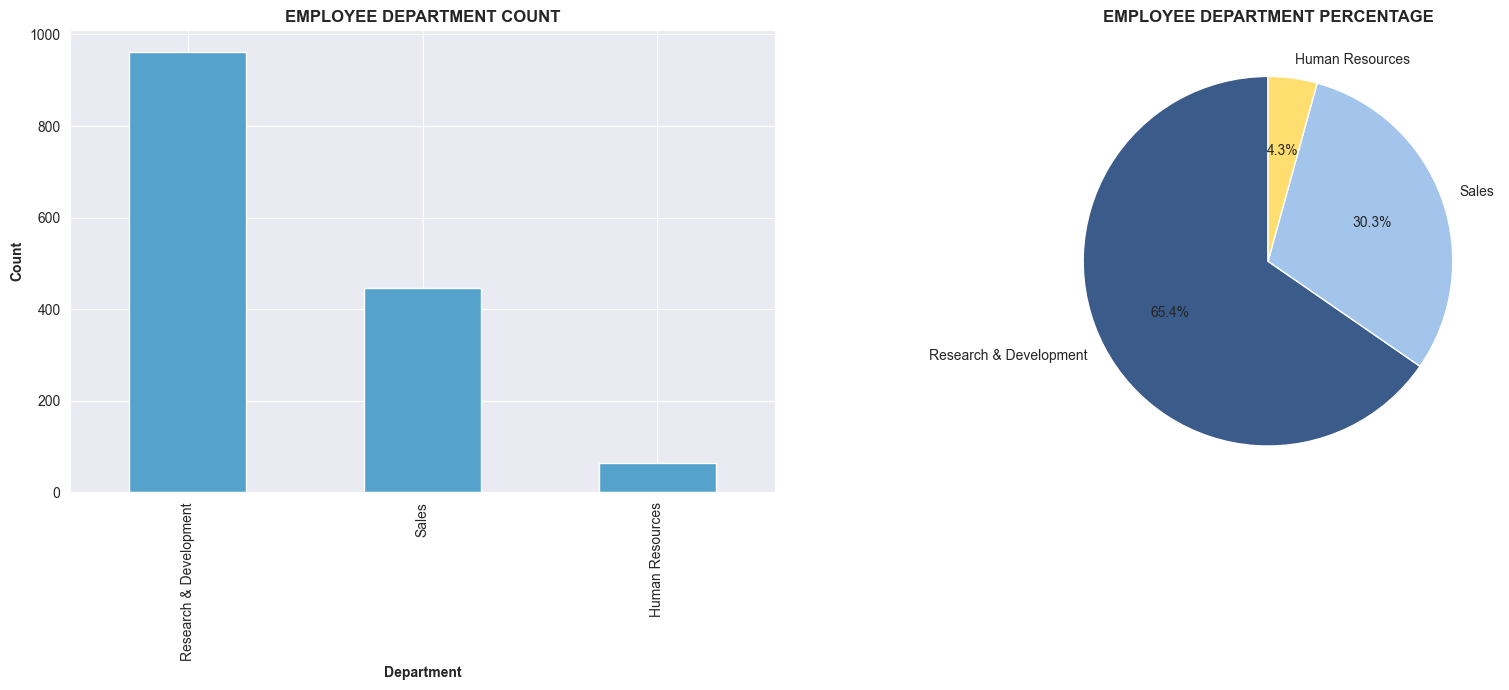

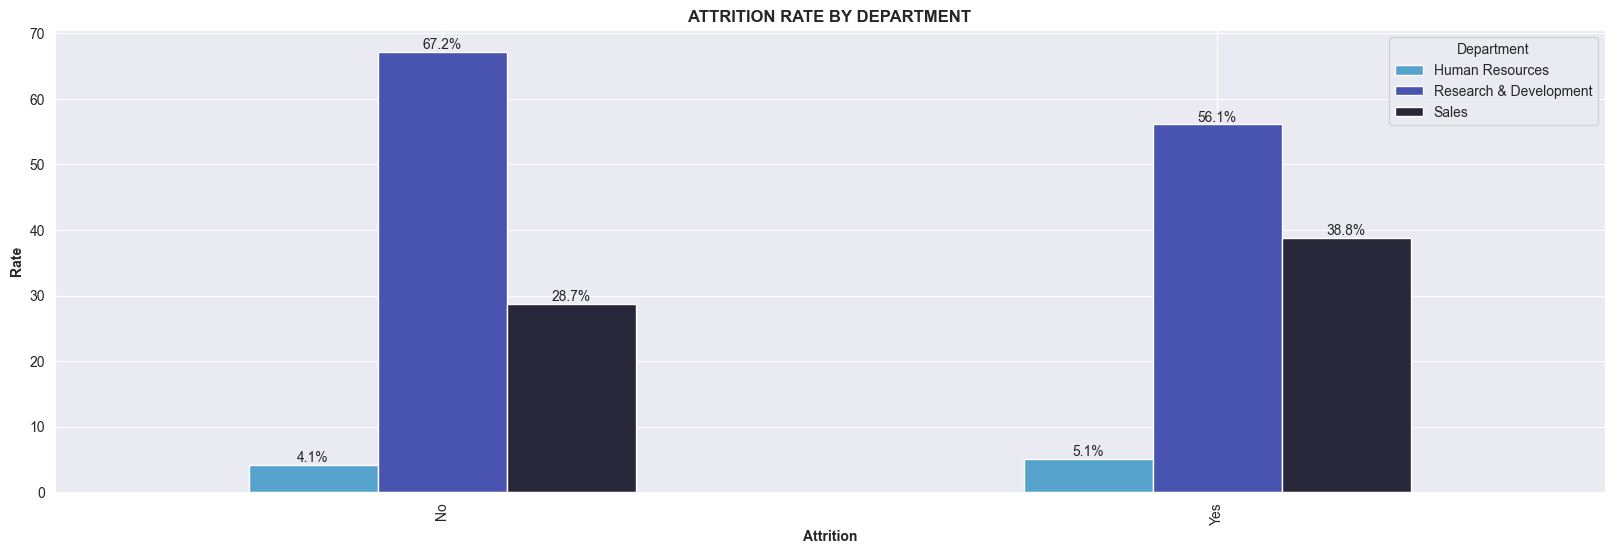

In [13]:
 # Plotting Department
plots ( DATA , 'Department' )
cat_plot( DATA , 'Attrition' , 'Department' )

From the output, we can observe that 65.4% of employees belong to the Research and Development department, 30.3% are in Sales, and only 4.3% are in Human Resources. In terms of attrition, Research and Development not only employs the majority of staff but also accounts for the highest attrition and retention rates, contributing 56.1% of total attrition and 67.2% of employees who remain with the company. The Sales department follows with an attrition rate of 38.8%, while Human Resources records the lowest attrition at just 5.1%. This suggests that although Research and Development is the core of the organization’s workforce, it also faces the greatest challenge in employee retention.


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


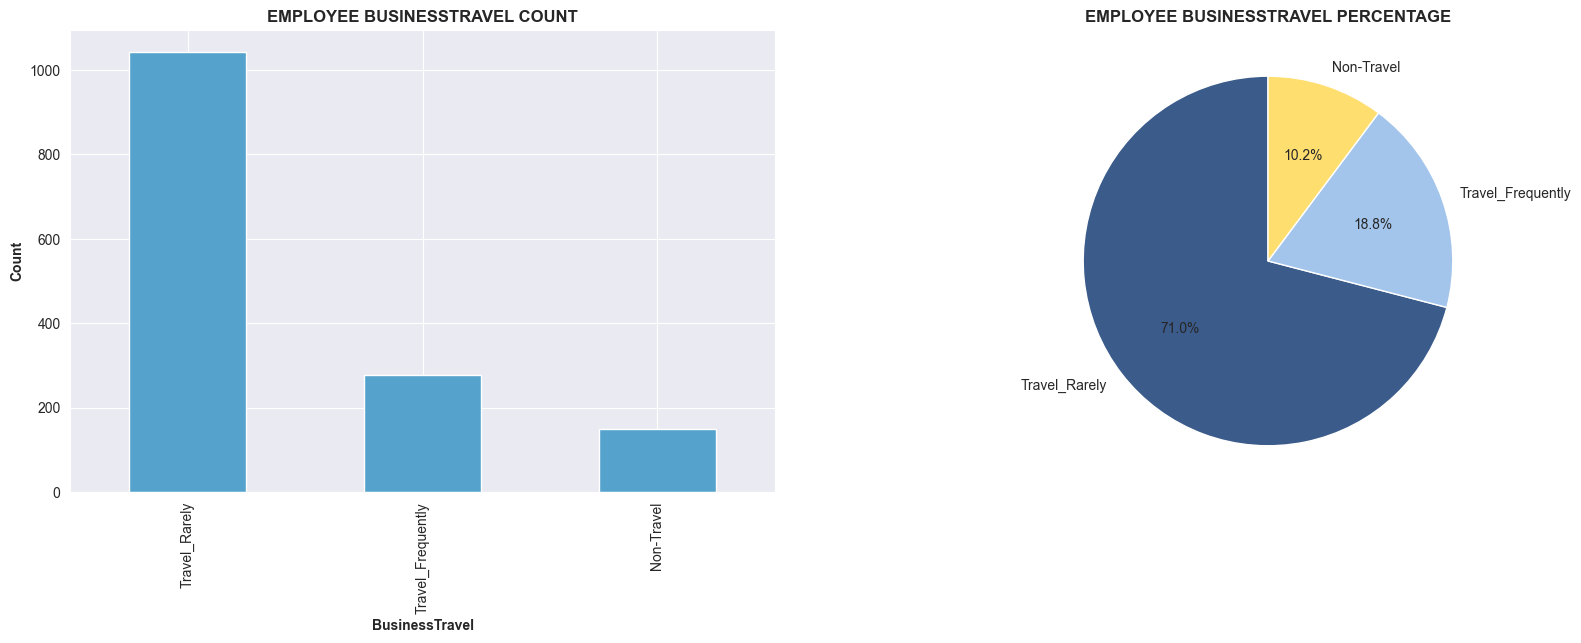

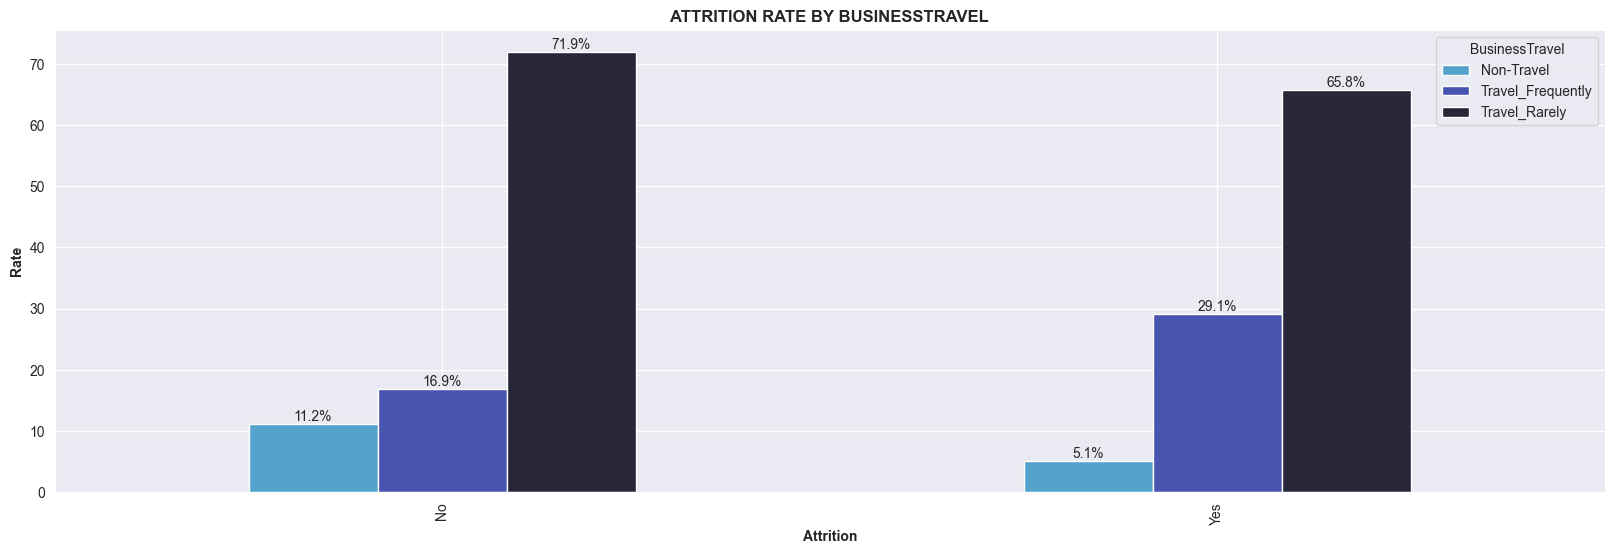

In [14]:
 # Plotting BusinessTravel
plots( DATA , 'BusinessTravel')
cat_plot( DATA , 'Attrition' , 'BusinessTravel' )

From the output, we can see that 71.0% of employees rarely travel, 18.8% travel frequently, and 10.2% do not travel at all. In terms of attrition, employees who rarely travel account for the highest proportion, with an attrition rate of 65.8% and a retention rate of 71.9%. This is followed by employees who travel frequently, contributing to 29.1% of the attrition and showing a lower retention rate of 16.1%. Employees who do not travel make up only 5.1% of the attrition, with a retention rate of 11.2%. This indicates that although the majority of employees rarely travel, they also form the largest group in both attrition and retention statistics.

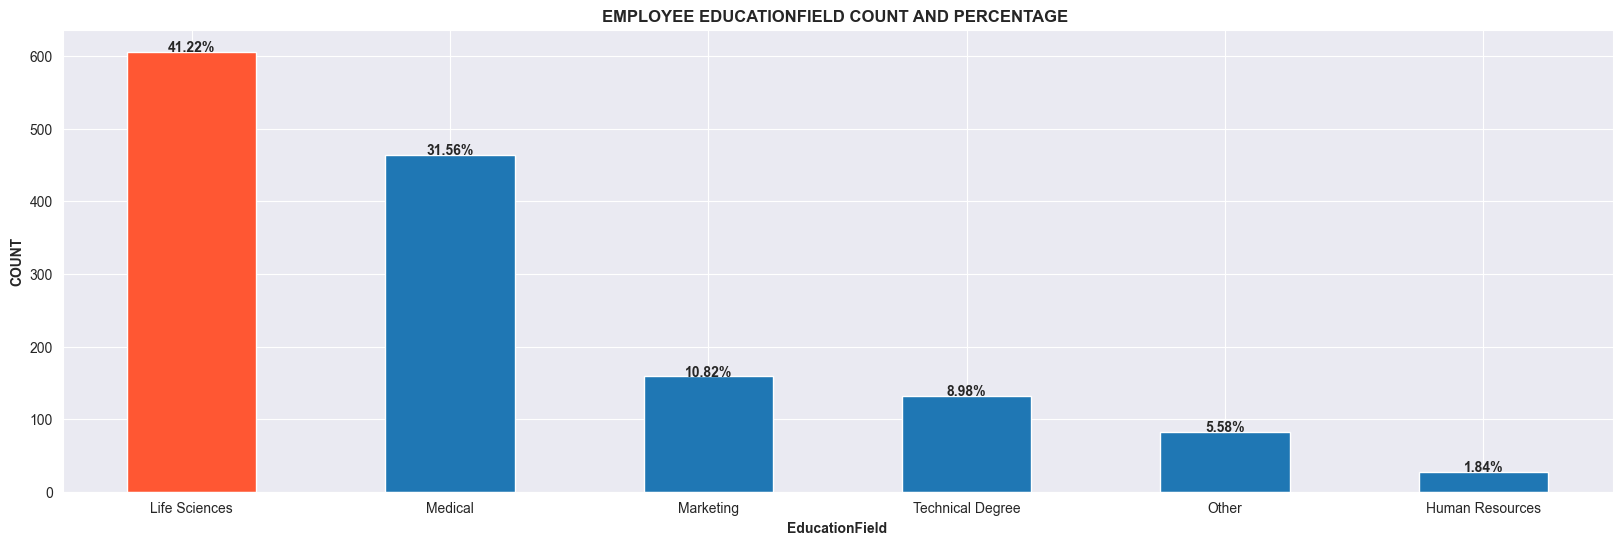

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


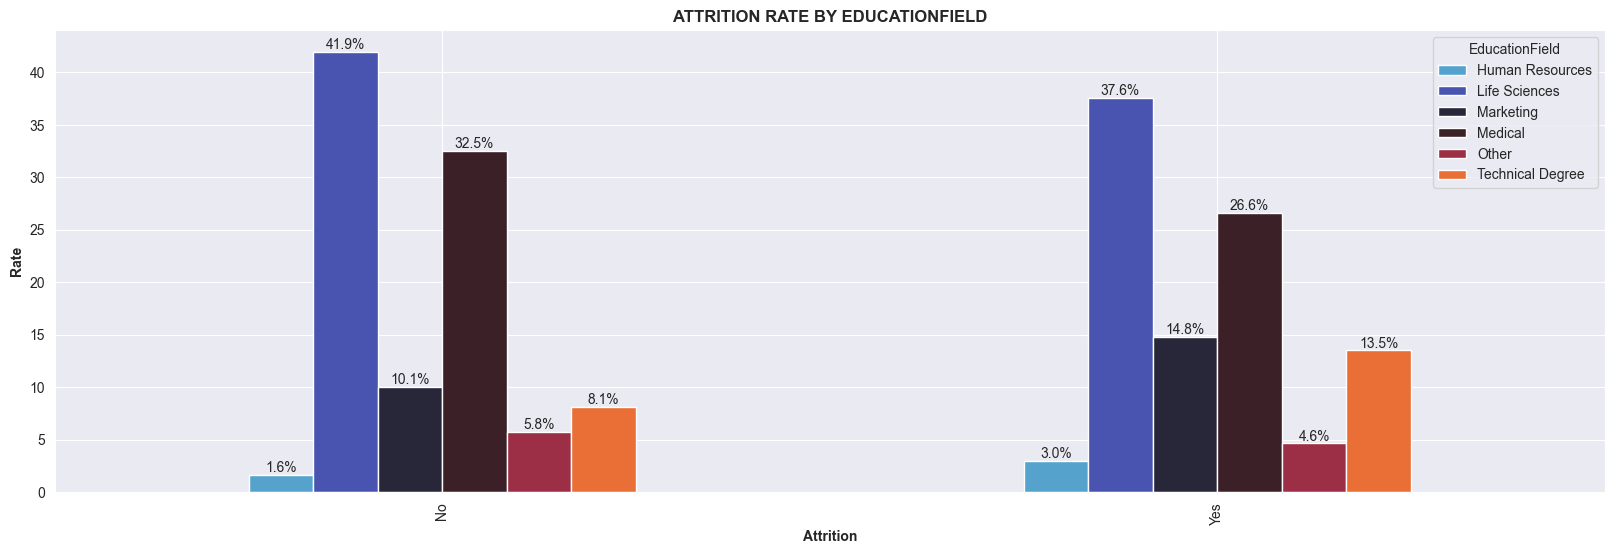

In [18]:
# Plotting
plots( DATA , 'EducationField')
cat_plot( DATA , 'Attrition' , 'EducationField' )

From the output, we observe that 41.22% of employees have an education background in Life Sciences, making it the most common field, while only 1.84% have an education in Human Resources, the least represented field. Life Sciences also accounts for the highest attrition rate at 37.6% and the highest retention rate at 41.9%, reflecting its large share of the workforce. On the other hand, Human Resources has the lowest attrition rate at just 3.0%, as well as the lowest retention rate of 16.1%, which aligns with its small employee representation.

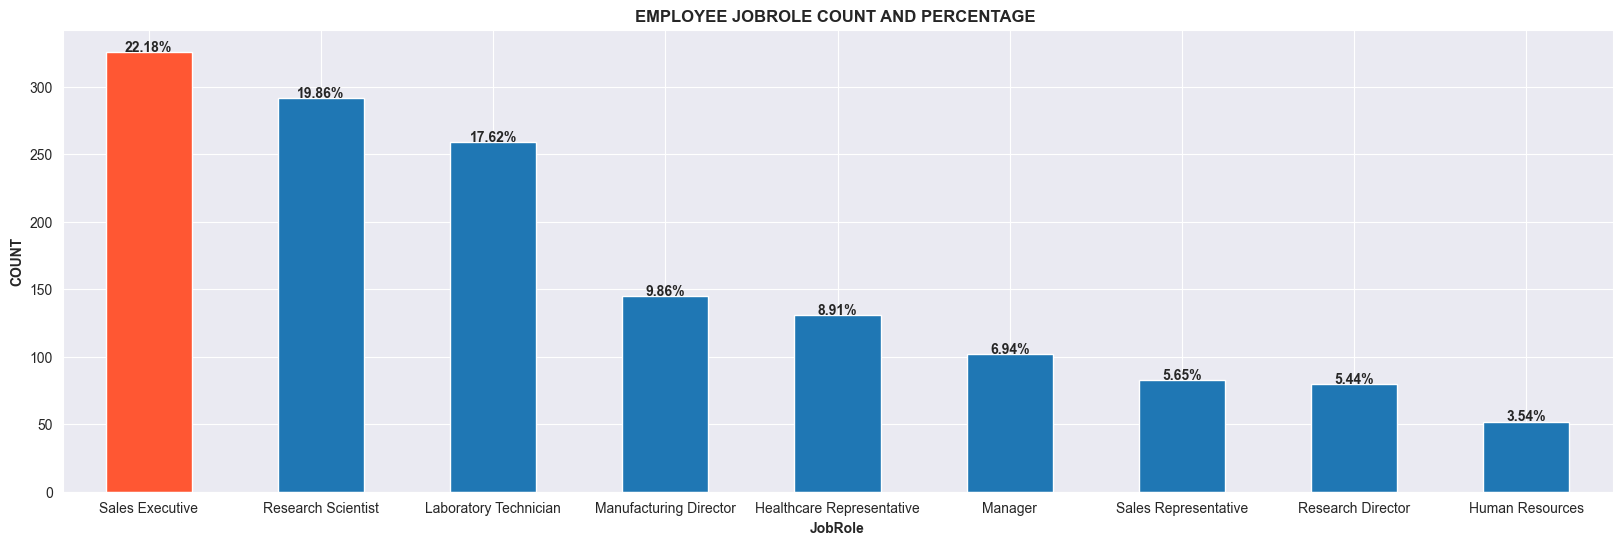

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


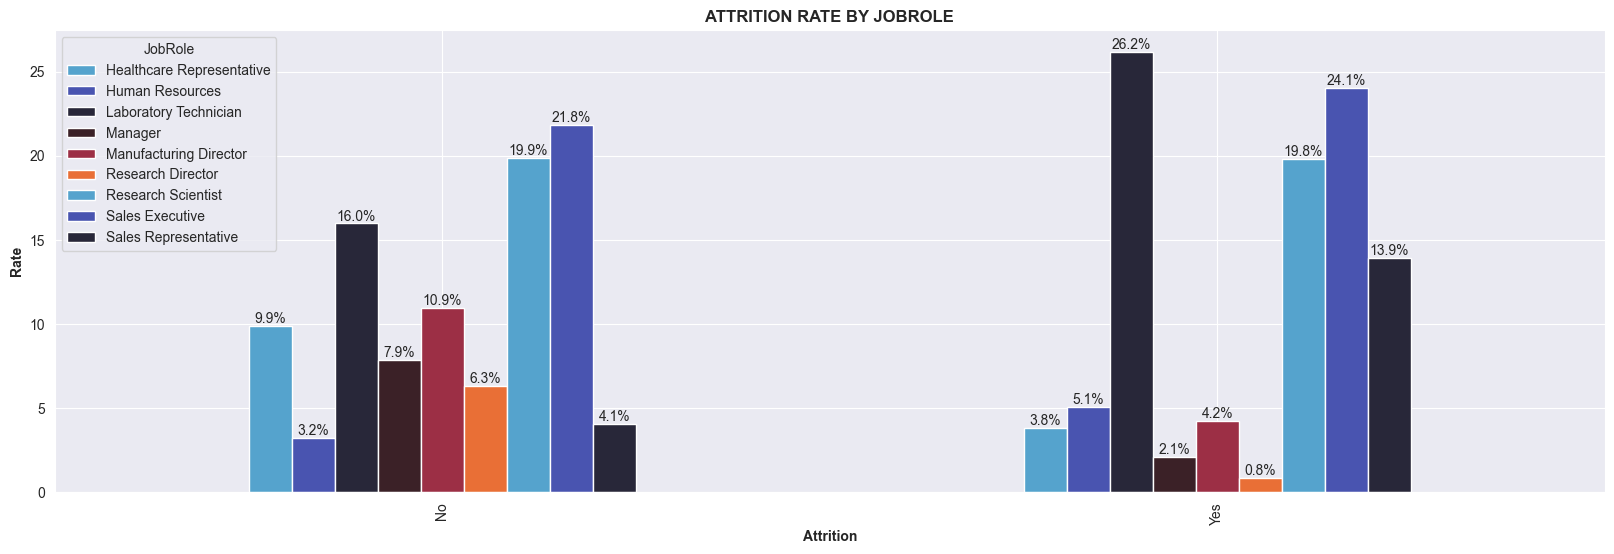

In [19]:
# Plotting Jobrole
plots( DATA , 'JobRole')
cat_plot( DATA , 'Attrition' , 'JobRole' )

From the output, we can see that employees with the job role of Sales Executive make up the largest portion at 22.18%, while those in Human Resources represent only 3.54% of the workforce. Laboratory Technicians exhibit the highest attrition rate at 26.2%, indicating a greater tendency to leave the company. In contrast, Research Directors have the lowest attrition rate at just 0.8%, suggesting strong job stability. When it comes to retention, Sales Executives lead with a rate of 21.8%, while Human Resources employees have the lowest retention rate at 3.2%.


### **Categorical - Ordinal Data Analysis**

In this section, we will analyze ordinal columns such as **JobLevel**, **JobInvolvement**, **Education**, **EnvironmentSatisfaction**, **JobSatisfaction**, **PerformanceRating**, **RelationshipSatisfaction**, and **WorkLifeBalance**. These variables are typically measured on a standardized scale (e.g., 1 to 5), where:

* **1** generally represents the *lowest level* of satisfaction, involvement, or performance.
* **5** represents the *highest level*.

By visualizing and examining the distributions and relationships of these columns with attrition, we aim to uncover patterns that may contribute to understanding employee engagement, satisfaction, and their influence on turnover.


In [20]:
 # Ordinal Data Function
def ord_data_plot( data , var1 , var2 ):

     # Getting the contingency table 
    ord_con = pd.crosstab( data[var2] , data[var1] )
    ord_con_per = pd.crosstab( data[var2] , data[var1] , normalize = 'index' ) * 100

    ord_con = ord_con[['Yes', 'No']]  
    ord_con_per = ord_con_per[['Yes', 'No']]

    # Plotting the bar plot with the crosstab result
    fig , ax = plt.subplots( 2 , 1 ,figsize = ( 15, 12))

    ord_con.plot(kind='bar', stacked=True, ax = ax[0])
    ord_con_per.plot(kind='bar', stacked=True, ax = ax[1])

    ax[0].set_title( var1.upper() + ' COUNT BY ' + var2.upper() , fontweight = 'bold')
    ax[0].set_ylabel( 'Count' , fontweight = 'bold')
    ax[0].set_xlabel( var2 , fontweight = 'bold')

    ax[1].set_title( var1.upper() + ' RATE BY ' + var2.upper() , fontweight = 'bold')
    ax[1].set_ylabel( 'Rate' , fontweight = 'bold')
    ax[1].set_xlabel( var2 , fontweight = 'bold')

     # Annotating the bars
    for container in ax[1].containers:
         # For each segment in the stack
        for bar in container:
            height = bar.get_height().round()
            if height > 0:  # Skip zero values
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2  # Center of the bar
                ax[1].annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=10, fontweight='bold')

    for container in ax[0].containers:
        # For each segment in the stack
        for bar in container:
            height = bar.get_height()
            if height > 0:  # Skip zero values
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2  # Center of the bar
                ax[0].annotate( height, (x, y), ha='center', va='center', fontsize=10, fontweight='bold')


    fig.tight_layout()
    return plt.show

In [21]:
 # Saving the columns in a list
ord_columns = [ 'JobLevel' , 'JobInvolvement' , 'Education' , 'EnvironmentSatisfaction' , 'JobSatisfaction' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'WorkLifeBalance' , 'StockOptionLevel']

<function matplotlib.pyplot.show(close=None, block=None)>

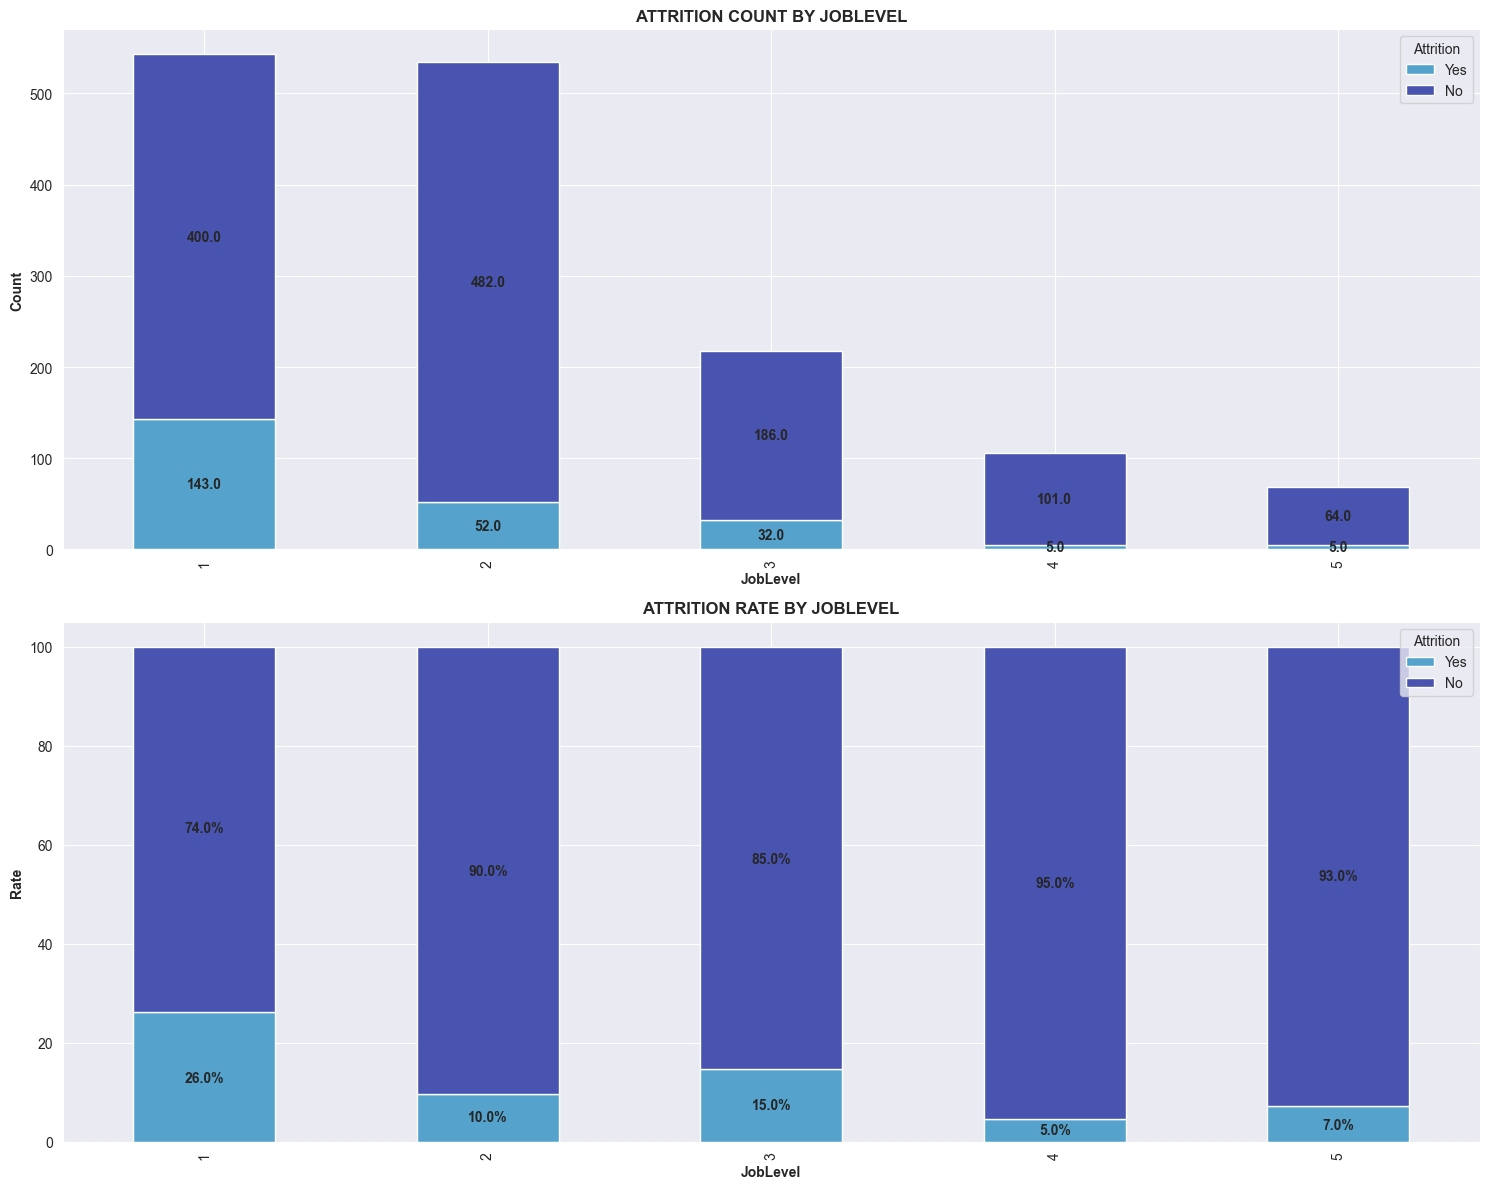

In [22]:
ord_data_plot( DATA , 'Attrition' , ord_columns[0] )

From the output, we observe that employees at **Job Level 1** represent the largest group, with **400 employees retained** and **143 employees having left** the company. This group also exhibits the **highest attrition rate at 26.0%**, indicating a potential vulnerability among entry-level staff. In contrast, employees at **Job Level 4** show the **lowest attrition rate of 5.0%** and the **highest retention rate of 95.0%**, suggesting that individuals in higher job levels are more likely to stay with the company.

<function matplotlib.pyplot.show(close=None, block=None)>

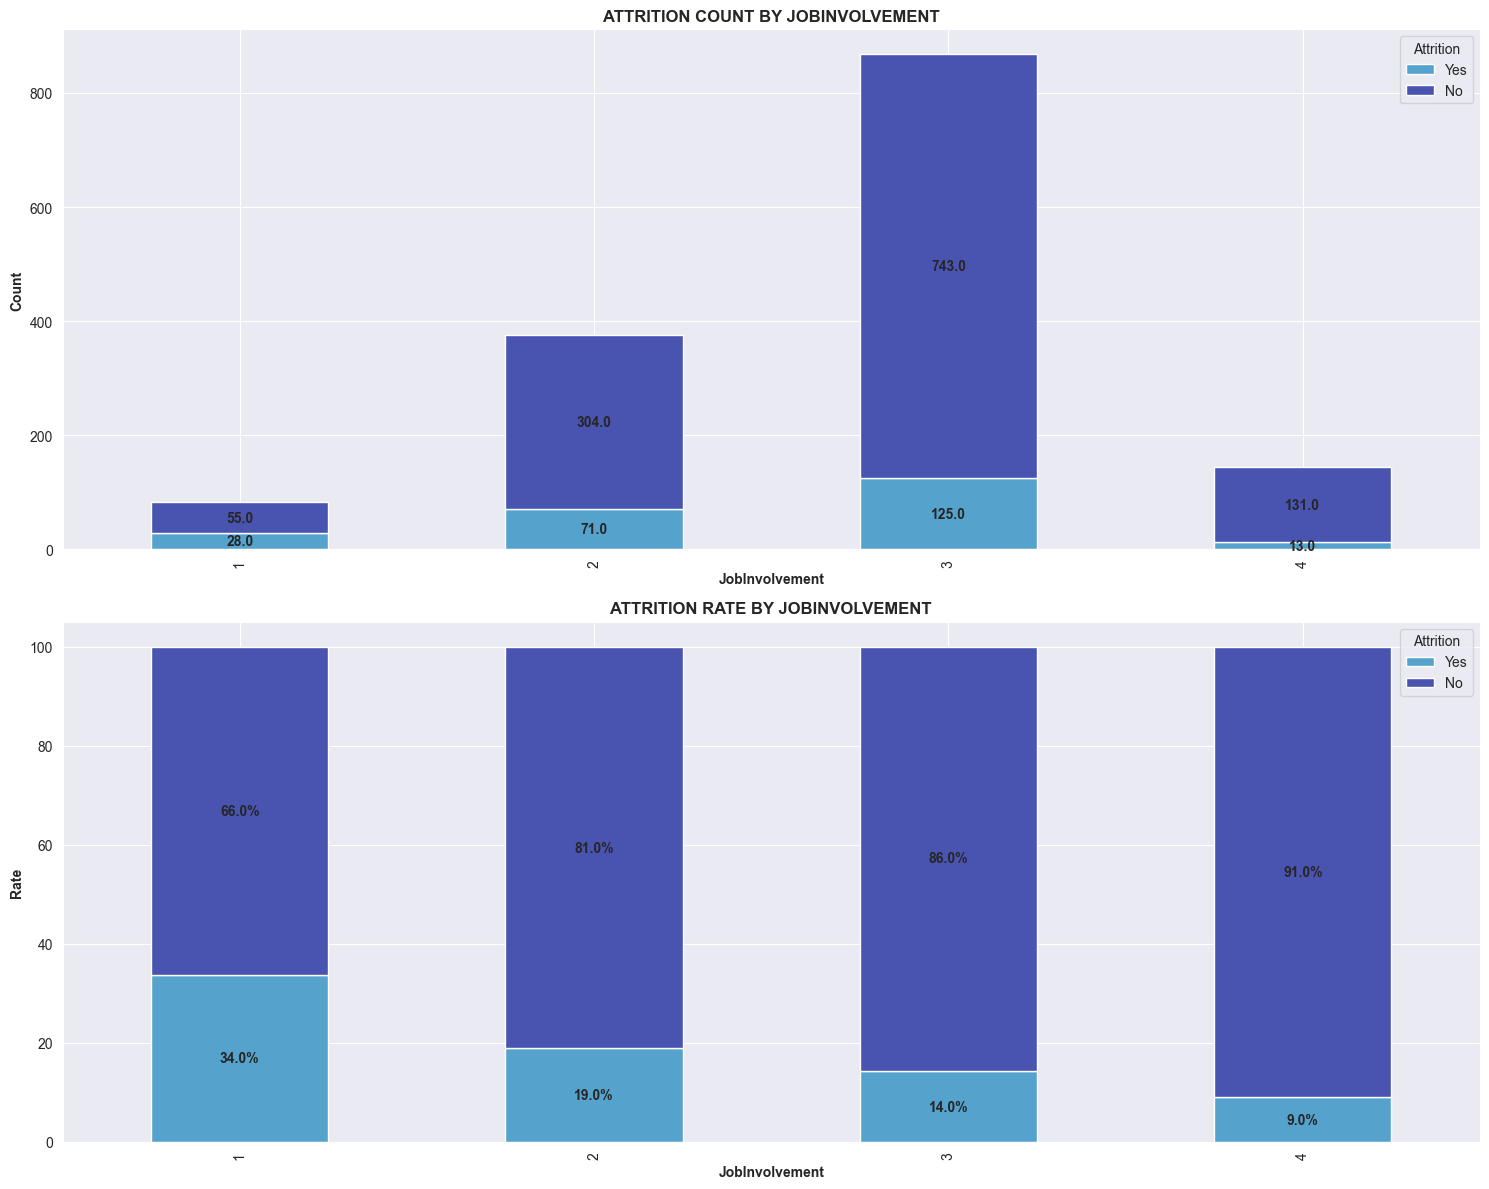

In [23]:
ord_data_plot( DATA , 'Attrition' , ord_columns[1] )

From the output, we can see that employees with **Job Involvement level 3** are the most common, with **743 employees retained** and **125 having left** the company. **Job Involvement level 1** has the **highest attrition rate at 34.0%**, indicating lower engagement may be linked to higher turnover. Conversely, employees with **Job Involvement level 4** show the **lowest attrition rate at 9.0%** and a **high retention rate of 91.0%**, suggesting that greater involvement is associated with increased employee retention.

<function matplotlib.pyplot.show(close=None, block=None)>

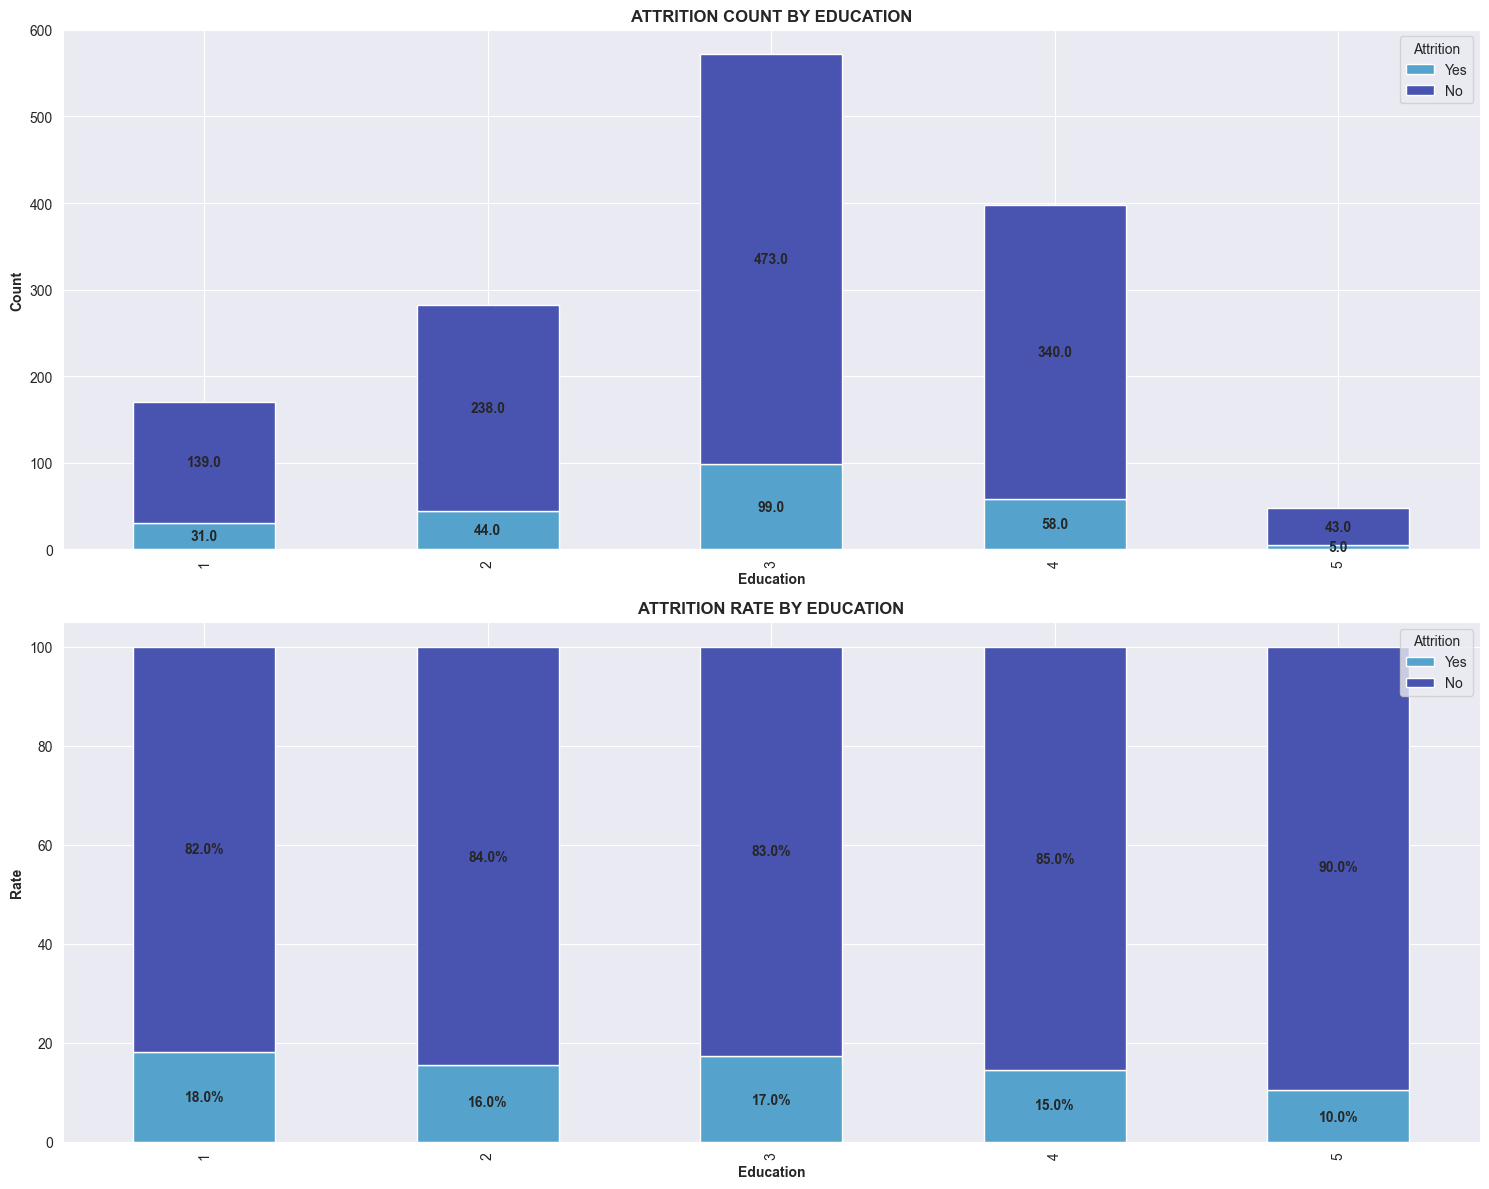

In [24]:
ord_data_plot( DATA , 'Attrition' , ord_columns[2] )

From the output, we observe that **Education level 3** has the highest number of employees, with **473 retained** and **99 having left** the company. **Education level 2** shows the **highest attrition rate at 18.0%**, indicating a potential trend of higher turnover at this education level. In contrast, **Education level 5** has the **lowest attrition rate**, with a **retention rate of 90.0%**, suggesting that higher educational attainment may be associated with greater employee retention.

<function matplotlib.pyplot.show(close=None, block=None)>

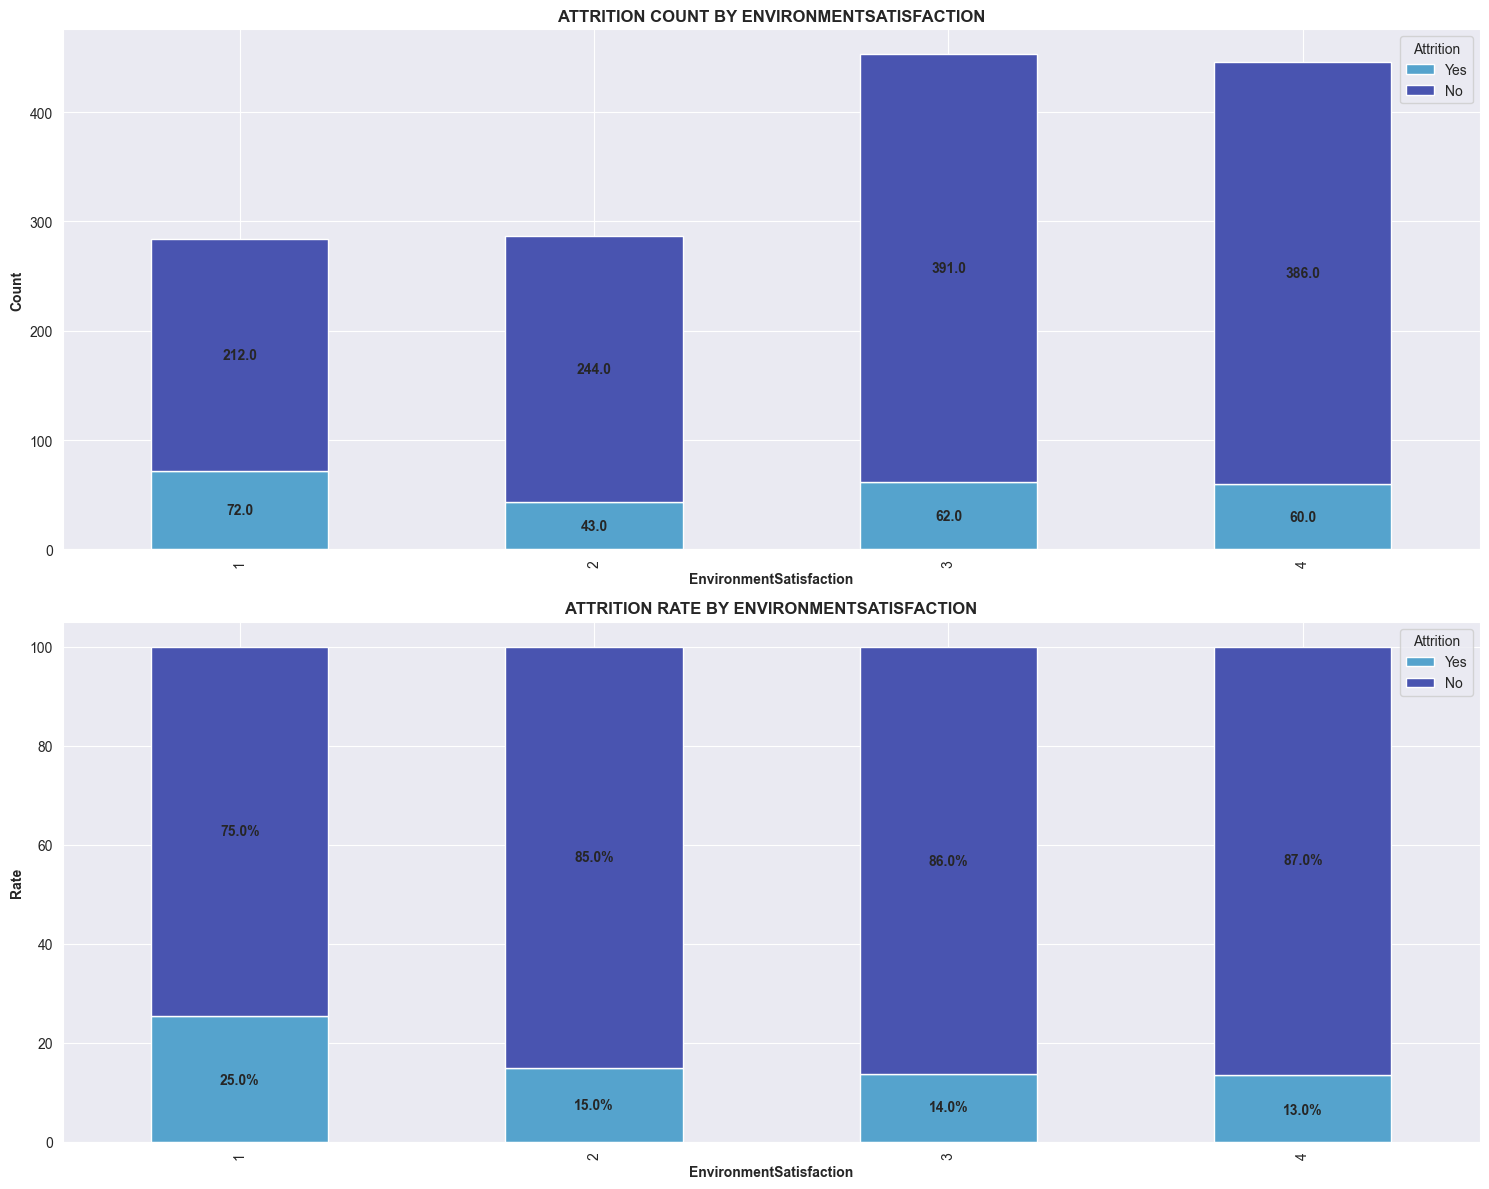

In [25]:
ord_data_plot( DATA , 'Attrition' , ord_columns[3] )

From the output, we can see that **Environment Satisfaction level 3** has the highest number of employees, with **391 retained** and **62 having left** the company. **Satisfaction level 1** has the **highest attrition rate at 25.0%**, indicating that lower satisfaction with the work environment may contribute to employee turnover. On the other hand, **Satisfaction level 4** has the **lowest attrition rate**, with a **retention rate of 87.0%**, suggesting that employees who are more satisfied with their environment are more likely to stay with the company.

<function matplotlib.pyplot.show(close=None, block=None)>

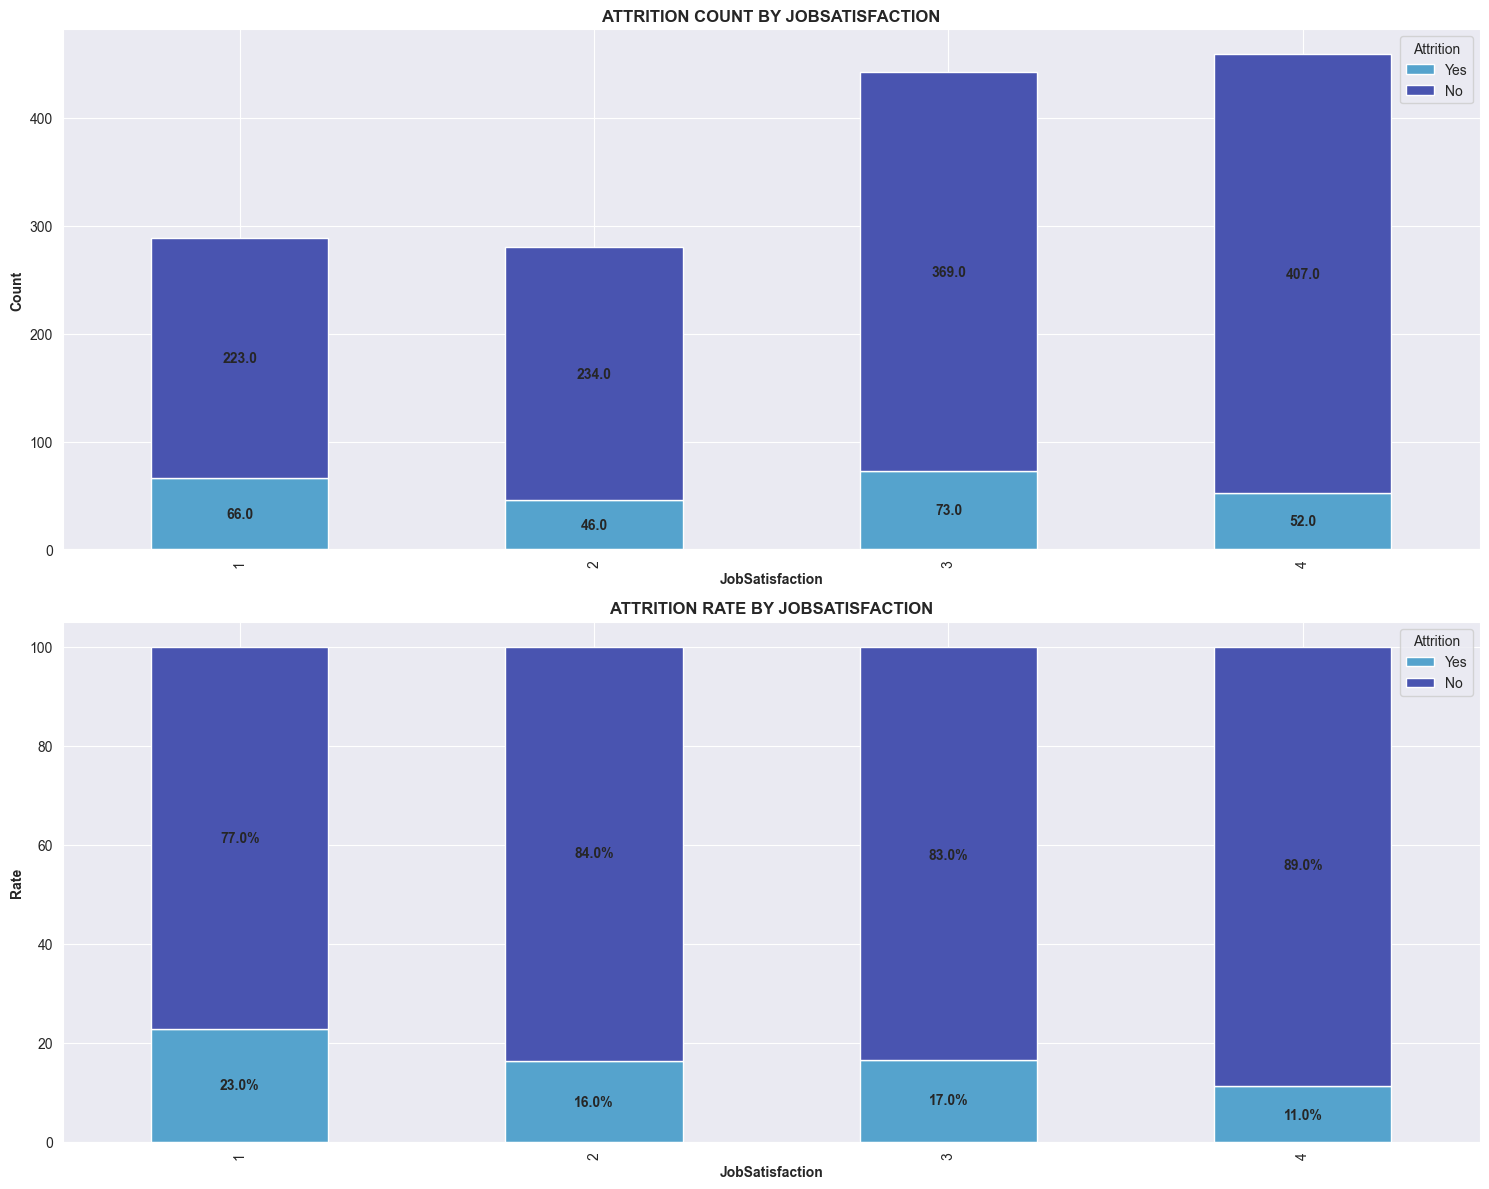

In [26]:
ord_data_plot( DATA , 'Attrition' , ord_columns[4] )

From the output, we observe that **Job Satisfaction level 4** has the highest number of employees, with **407 remaining** and **52 having left**. **Job Satisfaction level 1** shows the **highest attrition rate at 23.0%**, indicating that employees with low satisfaction are more likely to leave. In contrast, **Job Satisfaction level 4** has the **lowest attrition rate**, with a **retention rate of 89.0%**, suggesting that higher job satisfaction is associated with greater employee retention.

<function matplotlib.pyplot.show(close=None, block=None)>

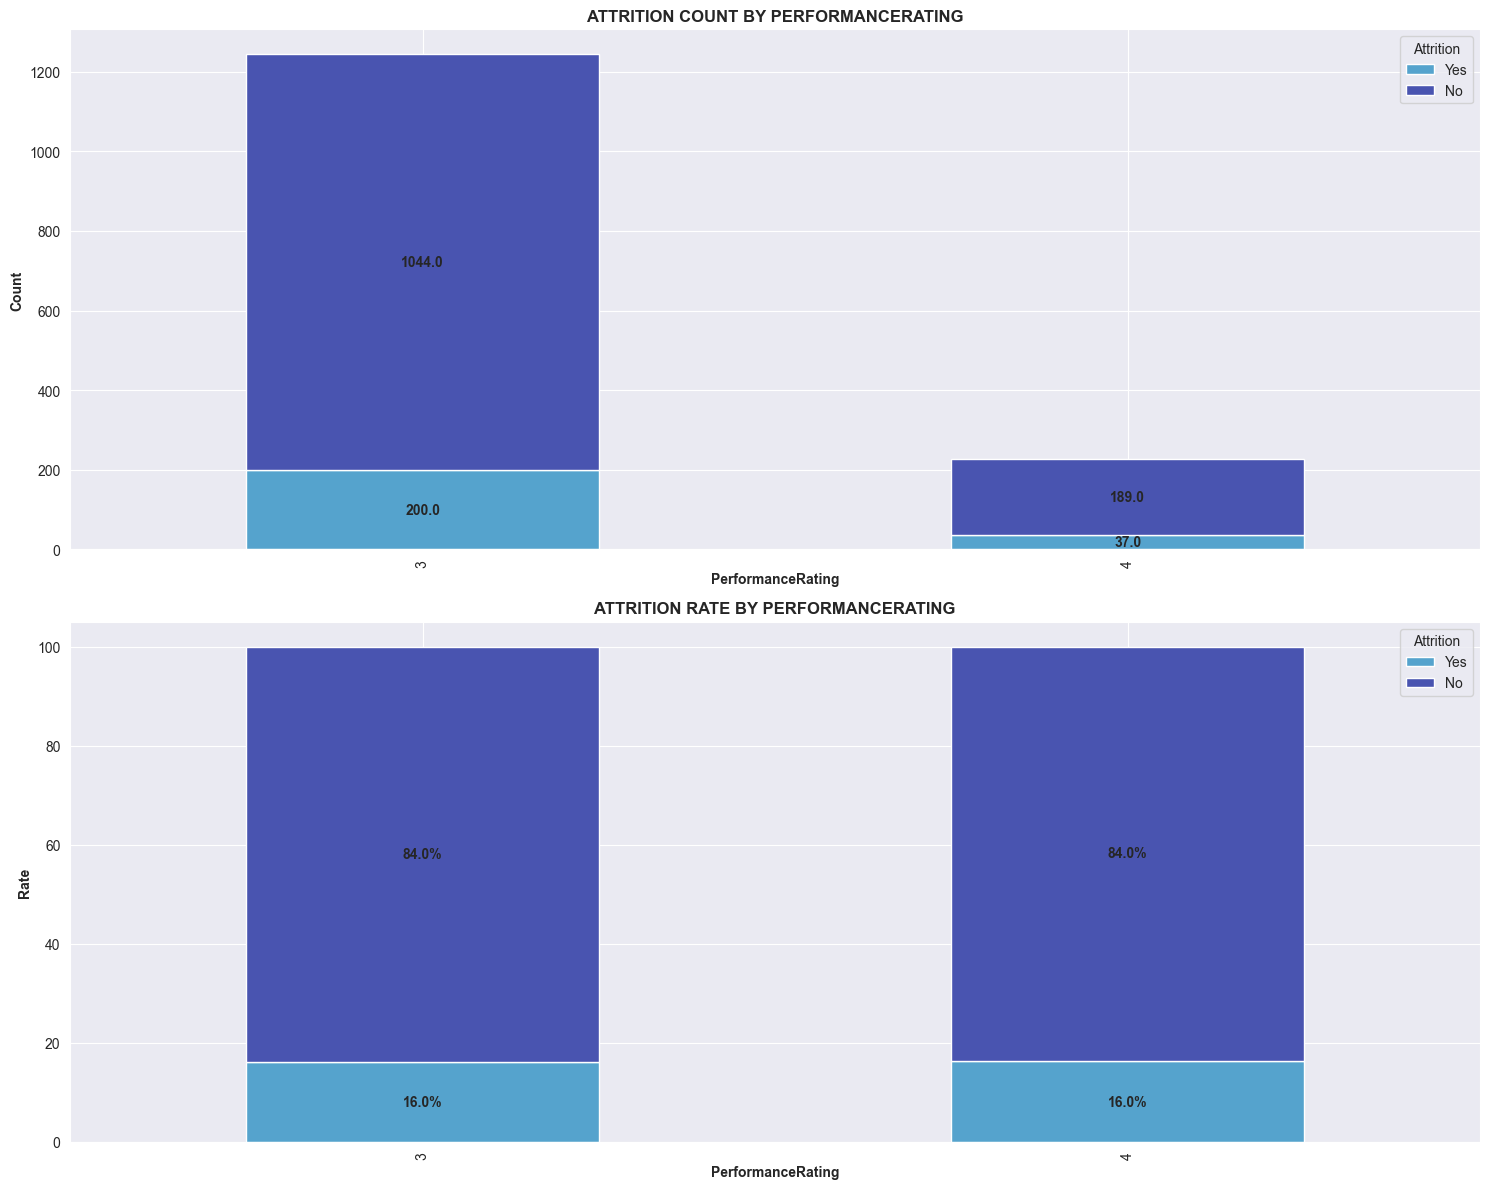

In [27]:
ord_data_plot( DATA , 'Attrition' , ord_columns[5] )

From the output, we can see that there are only two performance rating levels in the dataset: **3 and 4**. **Performance Rating 3** has the highest number of employees, with **1,044 remaining** and **200 having left**. Despite the difference in counts, both ratings exhibit an equal **attrition rate of 16.0%**, indicating that performance rating does not appear to significantly influence employee attrition in this case.

<function matplotlib.pyplot.show(close=None, block=None)>

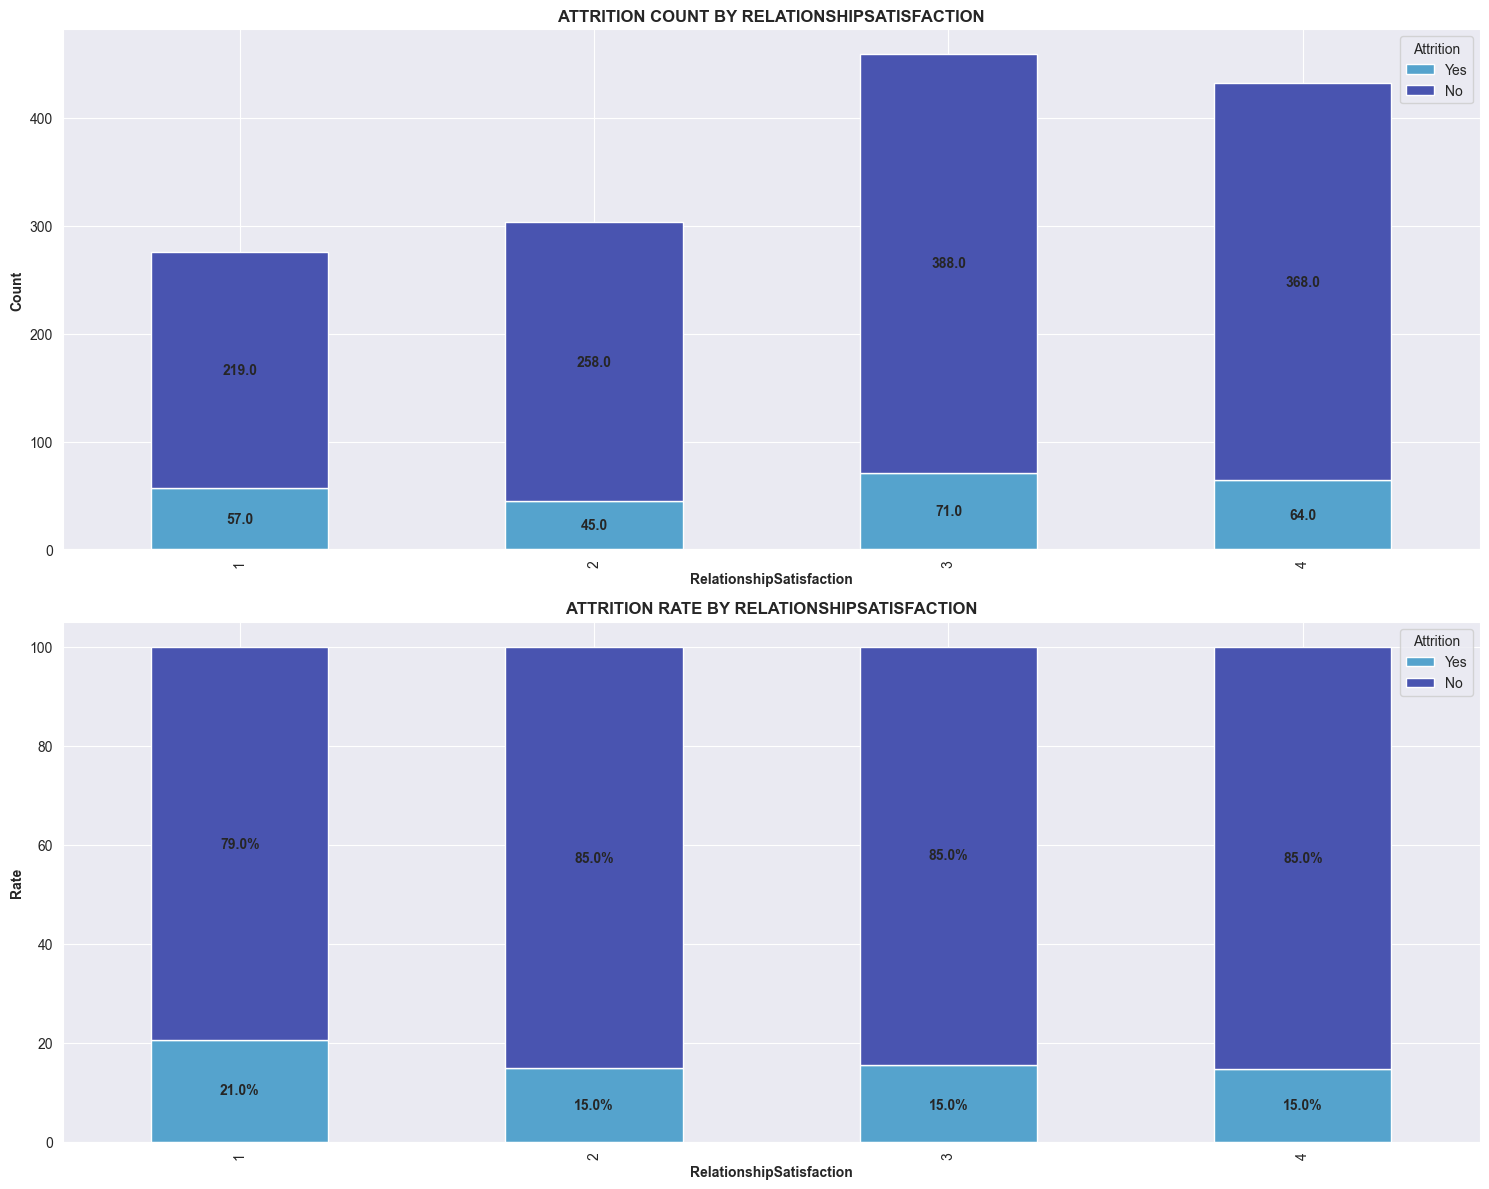

In [28]:
ord_data_plot( DATA , 'Attrition' , ord_columns[6] )

From the output, we observe that **Relationship Satisfaction level 3** has the highest number of employees, with **388 remaining** and **71 leaving**. The highest attrition rate is seen among employees with **satisfaction level 1**, at **21%**. In contrast, **levels 2, 3, and 4** all show relatively high retention rates, each at **85.0%**, suggesting that higher relationship satisfaction is generally associated with greater employee retention.

<function matplotlib.pyplot.show(close=None, block=None)>

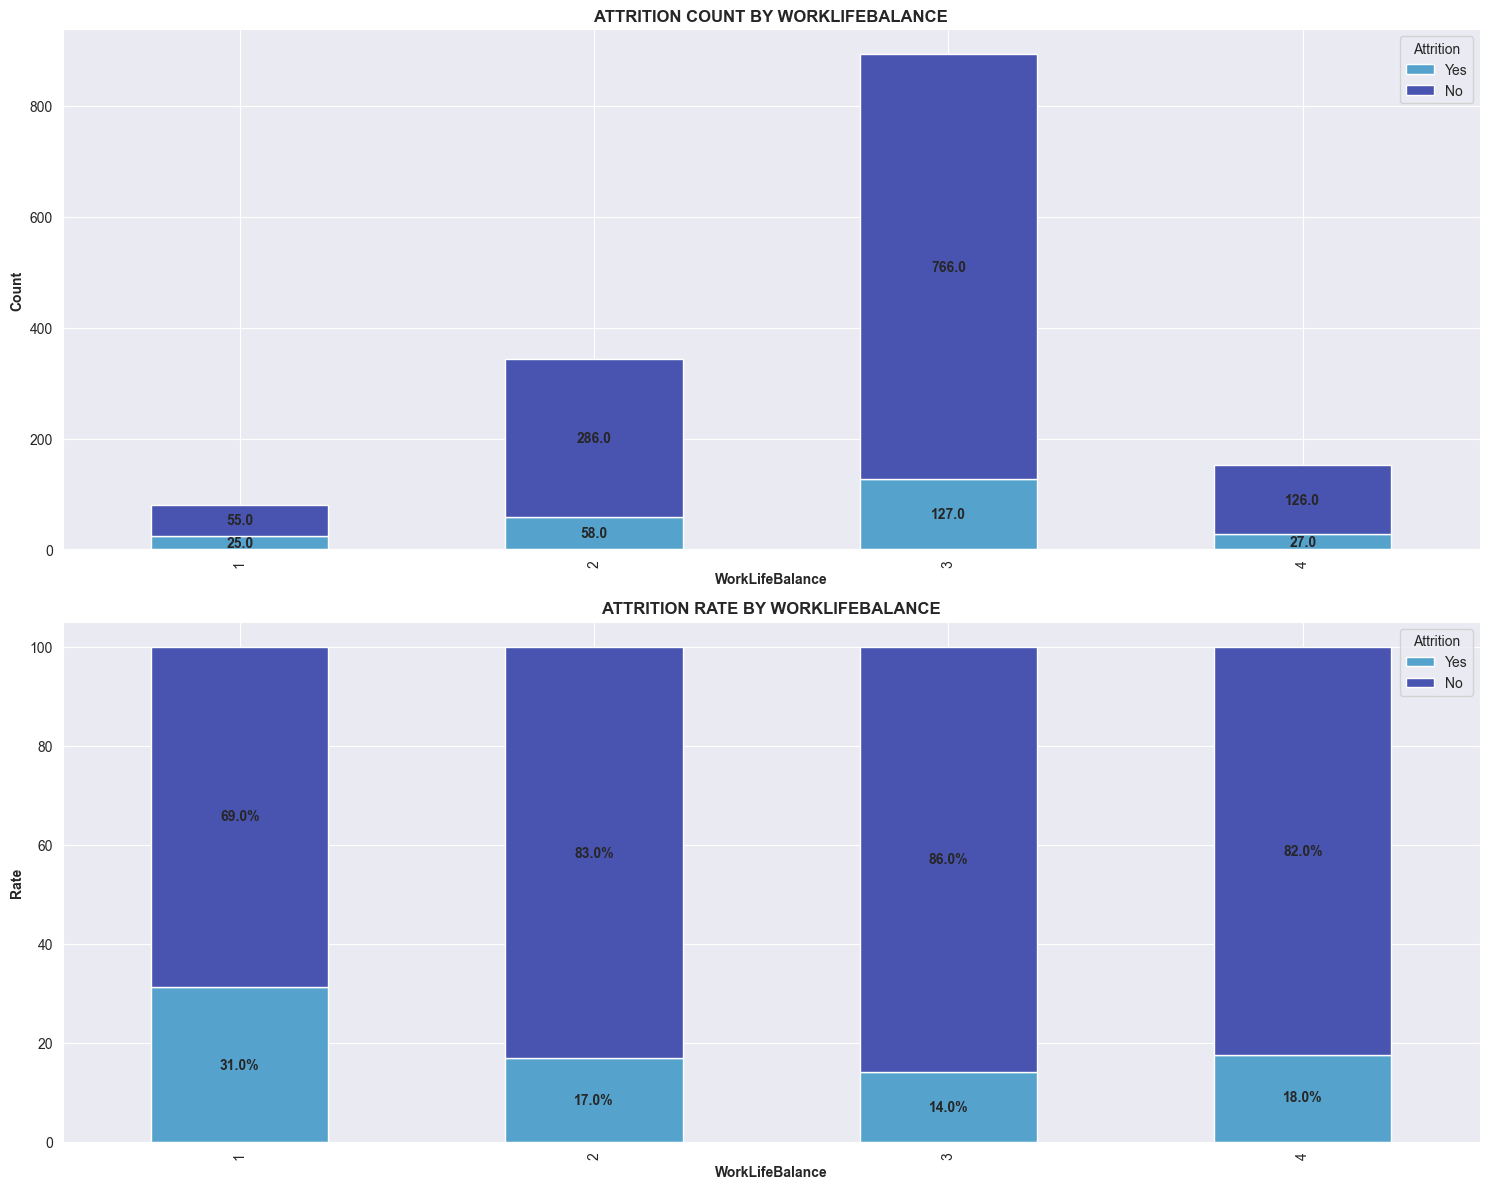

In [29]:
ord_data_plot( DATA , 'Attrition' , ord_columns[7] )

From the output, we observe that **Work-Life Balance rating 3** has the highest number of employees, with **766 remaining** and **127 leaving**. The highest attrition rate is associated with **rating level 1**, at **31%**, indicating poor work-life balance may contribute significantly to employee turnover. In contrast, **rating level 3** shows the **lowest attrition and a high retention rate of 86.0%**, suggesting a balanced work-life environment supports employee retention.

<function matplotlib.pyplot.show(close=None, block=None)>

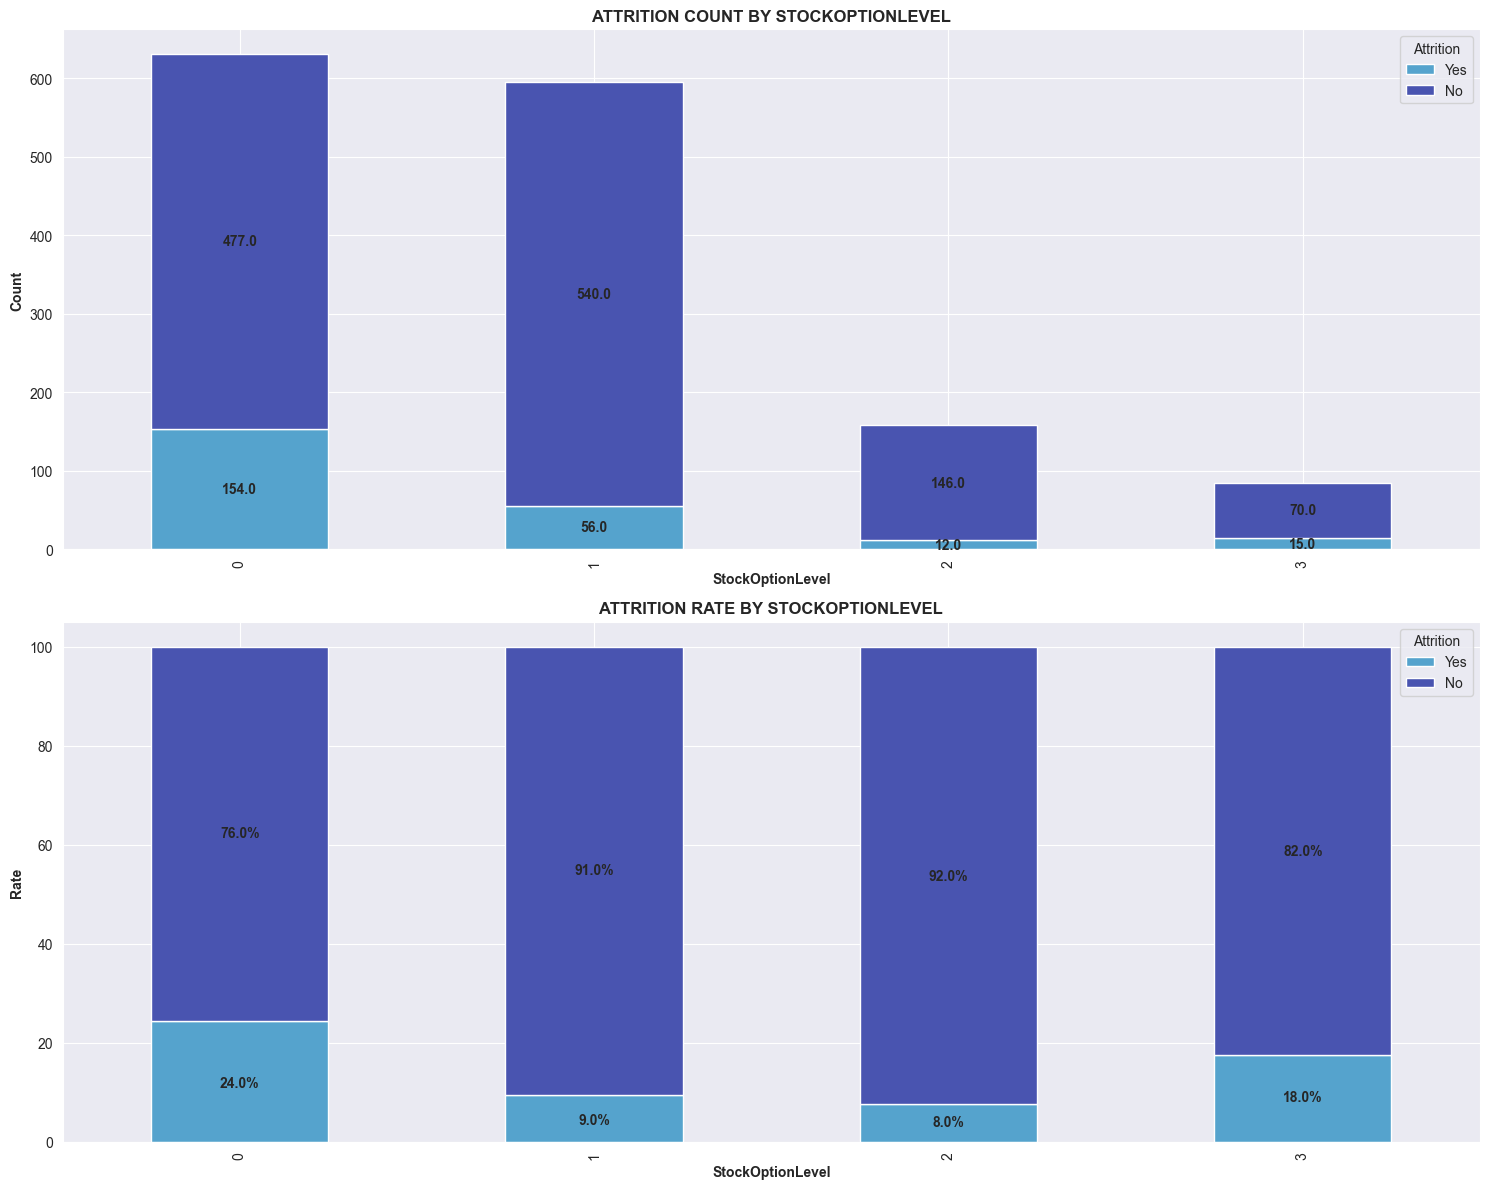

In [30]:
ord_data_plot( DATA , 'Attrition' , ord_columns[8] )

From the output we can see that individuals with 0 stock level options have the highest attrition rate of 24% while employees with the  stock option level 2 has the highest retention rate of 92% 

### **Categorical - Numerical Data Analysis**

In this section, we analyze how continuous numerical variables relate to employee attrition. By comparing the distributions and averages of these variables across attrition statuses, we aim to uncover patterns or discrepancies that may indicate underlying causes of employee turnover. This analysis will help identify which numerical factors—such as age, income, distance from home, or years at the company—are more closely associated with whether an employee stays or leaves.


In [31]:
cont_columns = [ 'Age','DailyRate' , 'DistanceFromHome' , 'HourlyRate' , 'MonthlyIncome' , 'MonthlyRate' , 'NumCompaniesWorked' , 'PercentSalaryHike' , 'StandardHours' , 'TotalWorkingYears' , 'TrainingTimesLastYear' , 'YearsAtCompany' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager']

In [32]:
 # Continous data Function
def cont_plots( data , var1 , var2 ):
    
    mean_value = np.mean( data[var2] ) # Getting the Mean
     # Plotting Histopgram and Box Plot
    fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 6 ) )
    sns.histplot( x = var2 , hue = var1 , data = data , kde=True , ax = ax[0])
    sns.boxplot( x = var1 , y = var2 , hue = var1 , data = data , ax = ax[1] , showmeans = True , meanprops={'marker':'o','markerfacecolor':'orange', 'markeredgecolor':'orange','markersize':'7'} )

    ax[0].axvline(mean_value, color='orange', linestyle='--', label='Mean')

    plt.suptitle('DISTRIBUTION OF  ' + var1.upper() +  ' BY ' + var2.upper() , fontweight = 'bold')

    return plt.show()

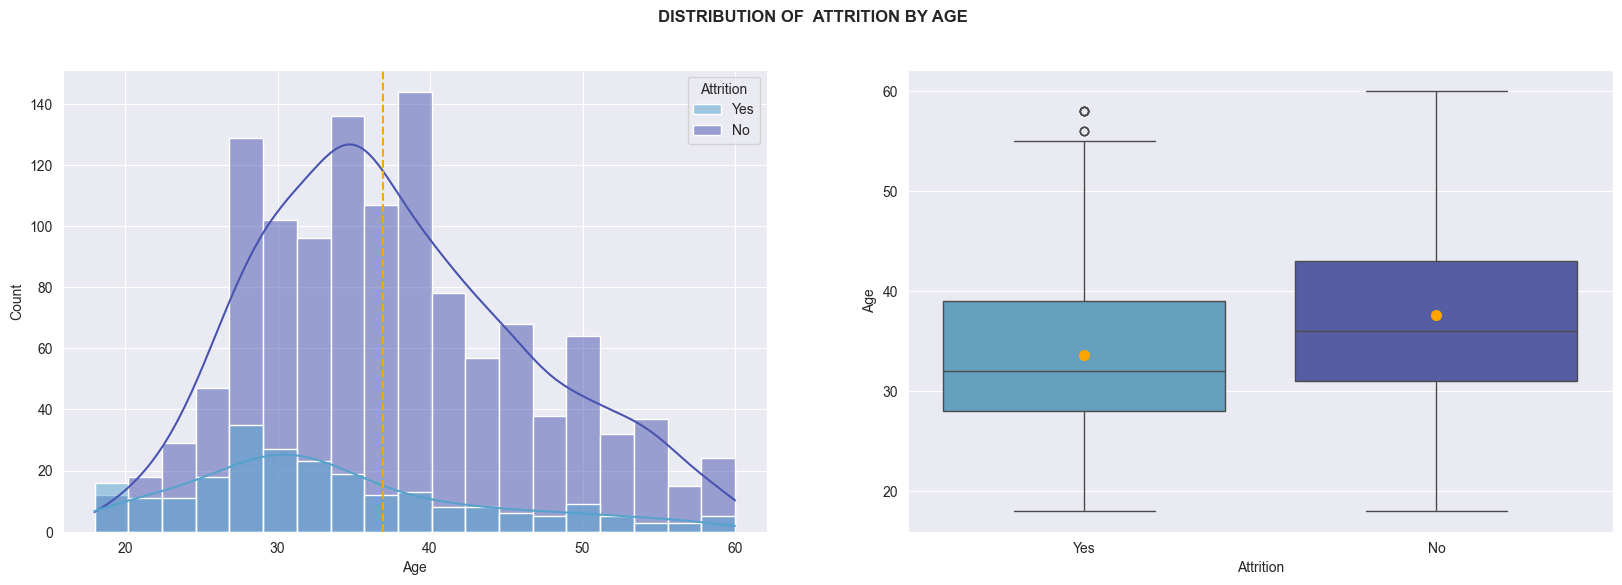

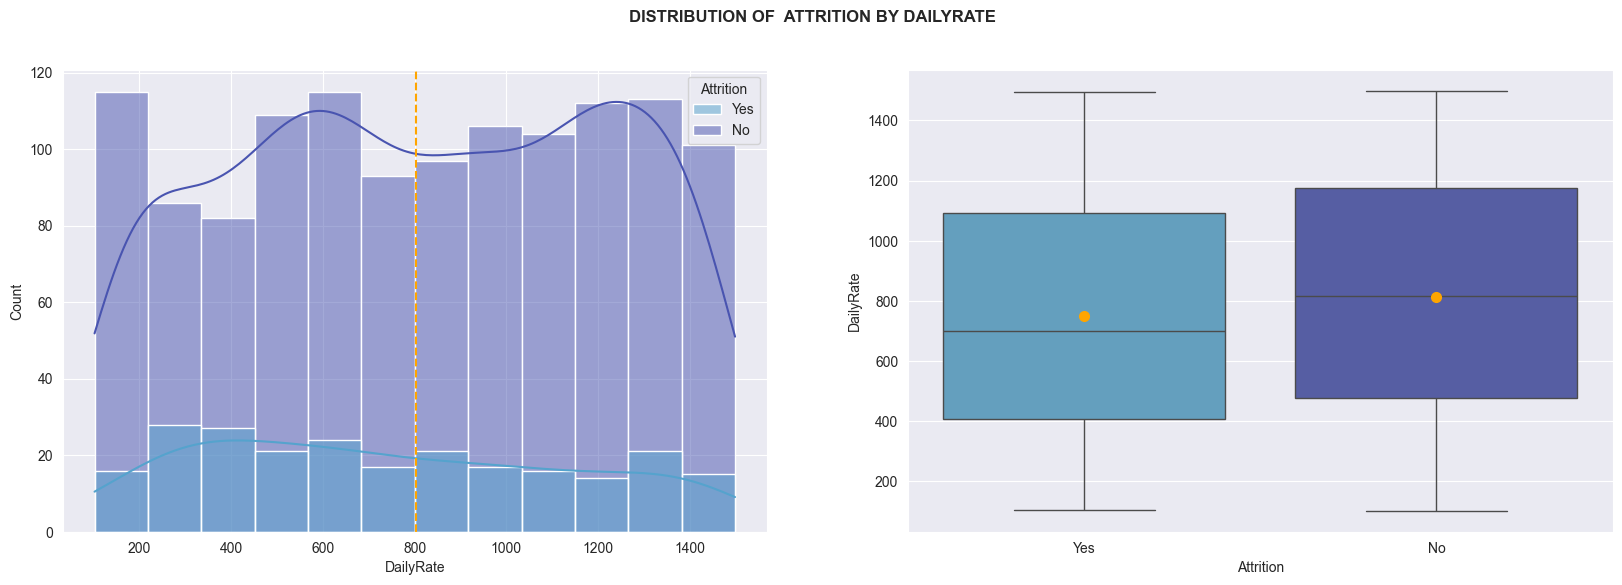

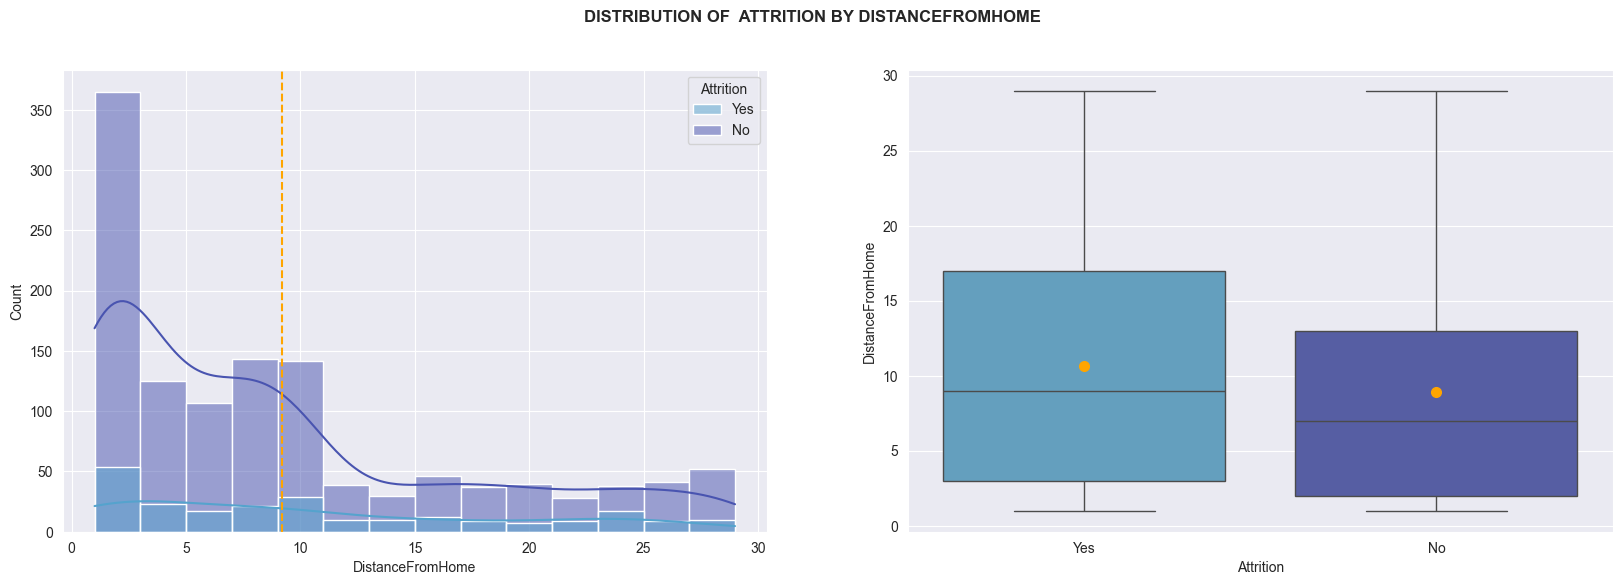

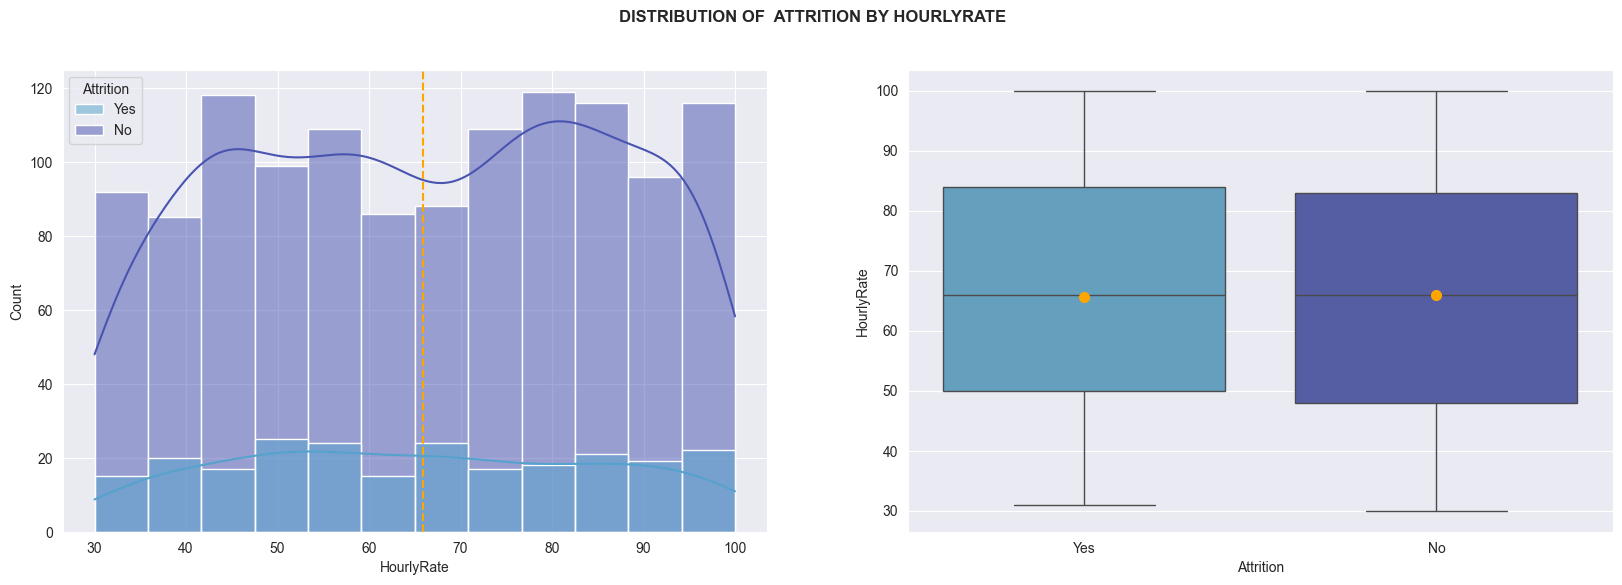

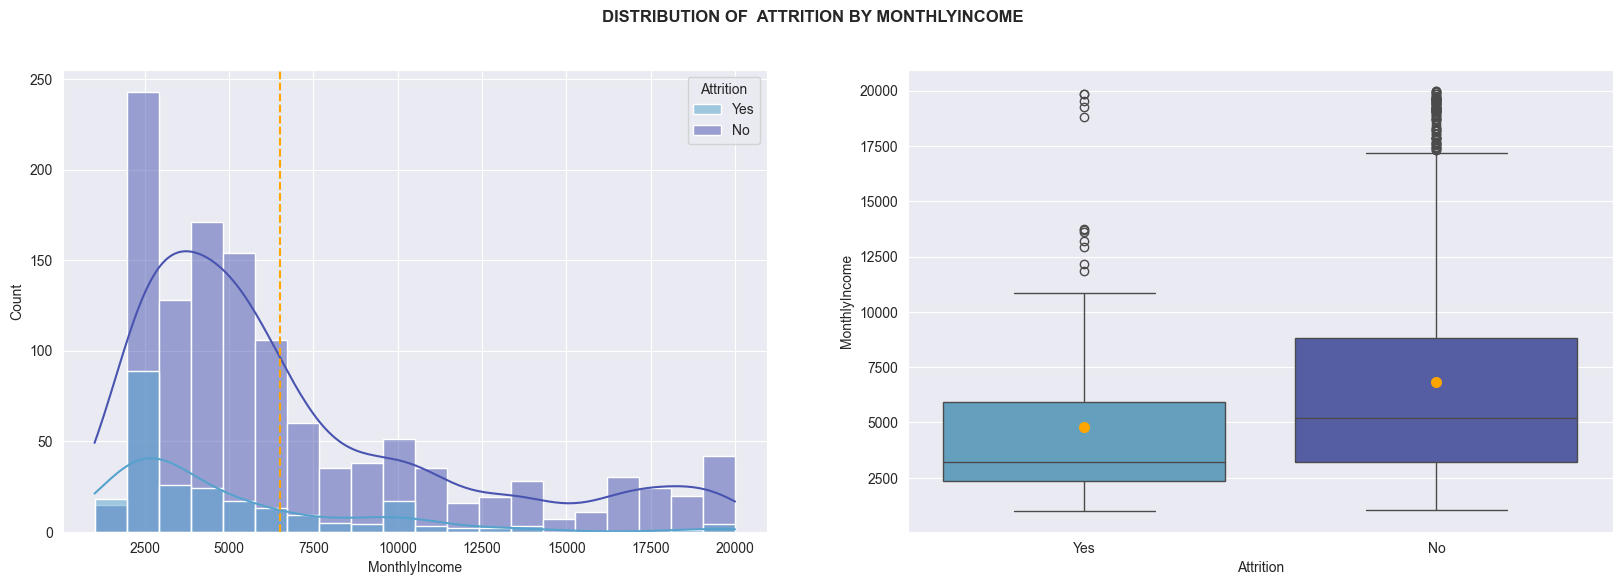

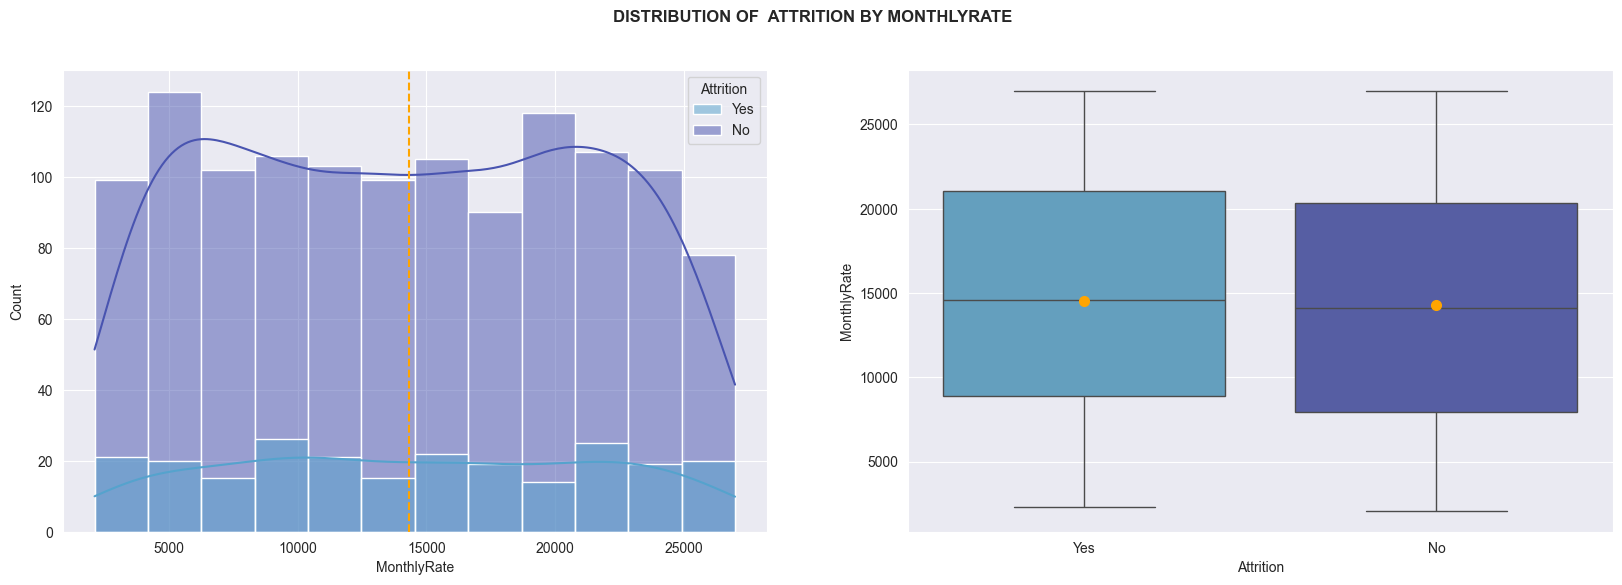

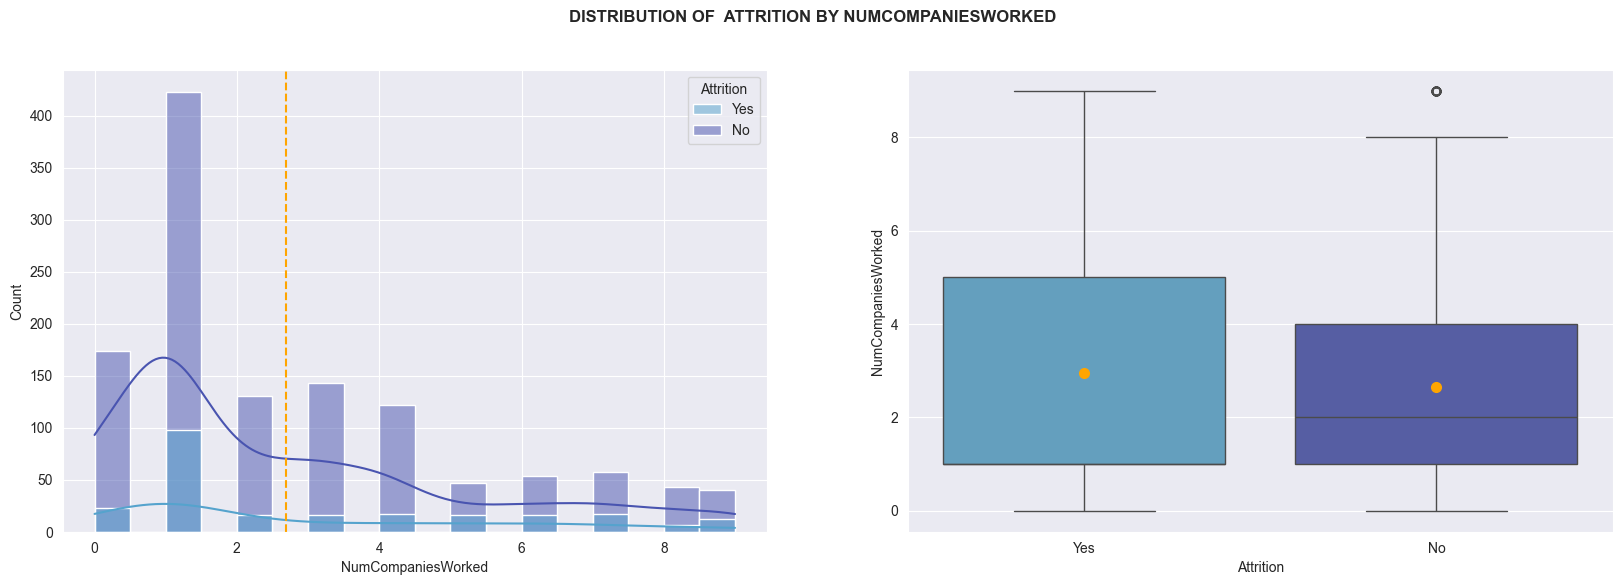

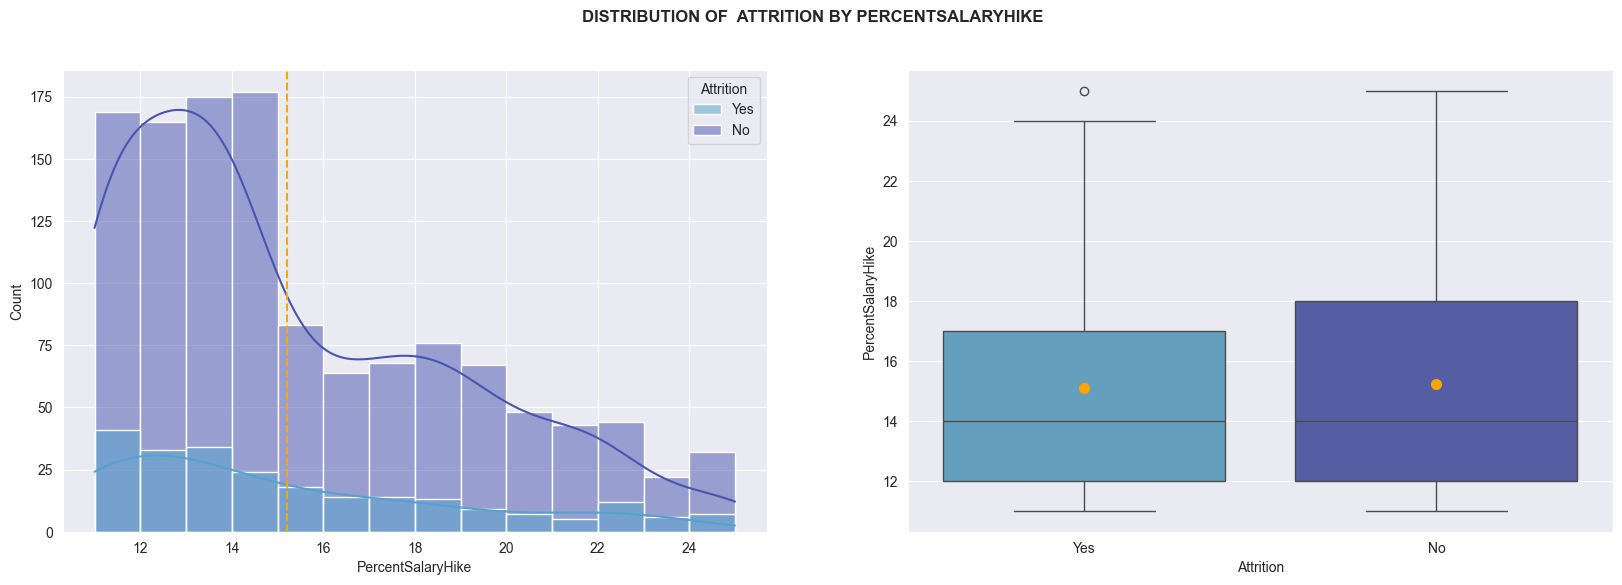

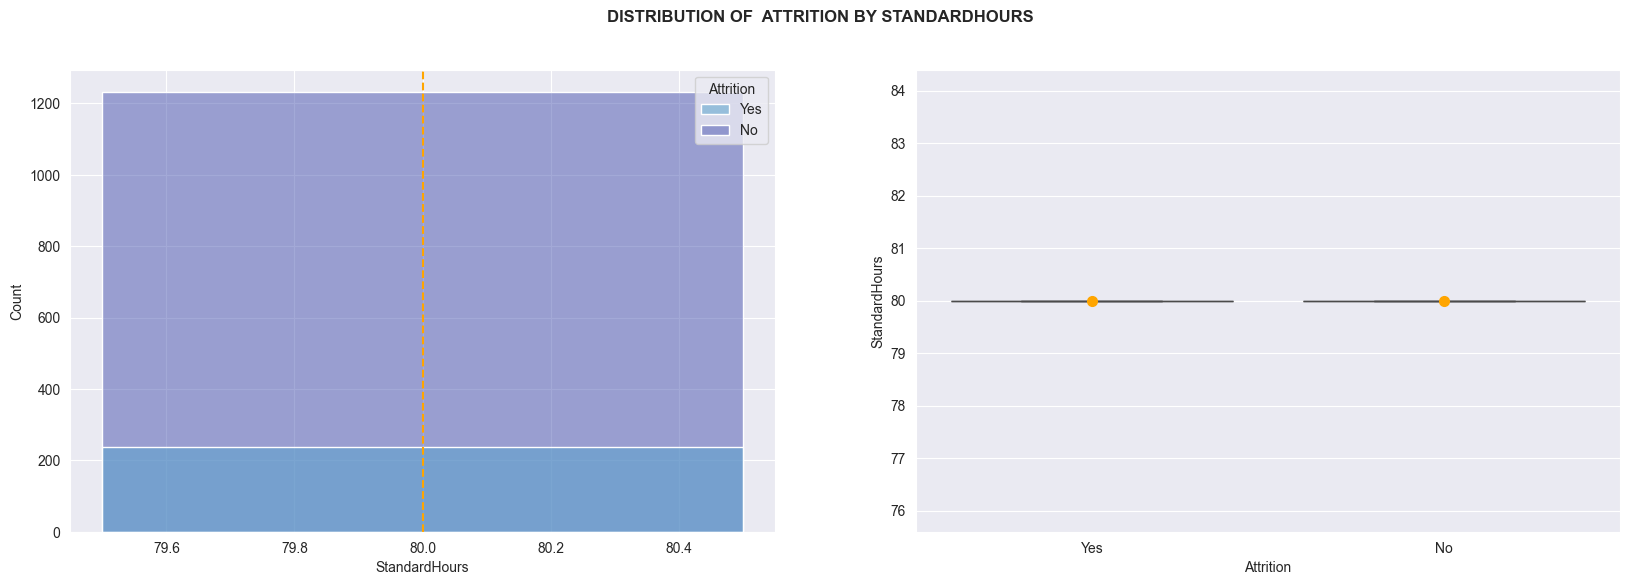

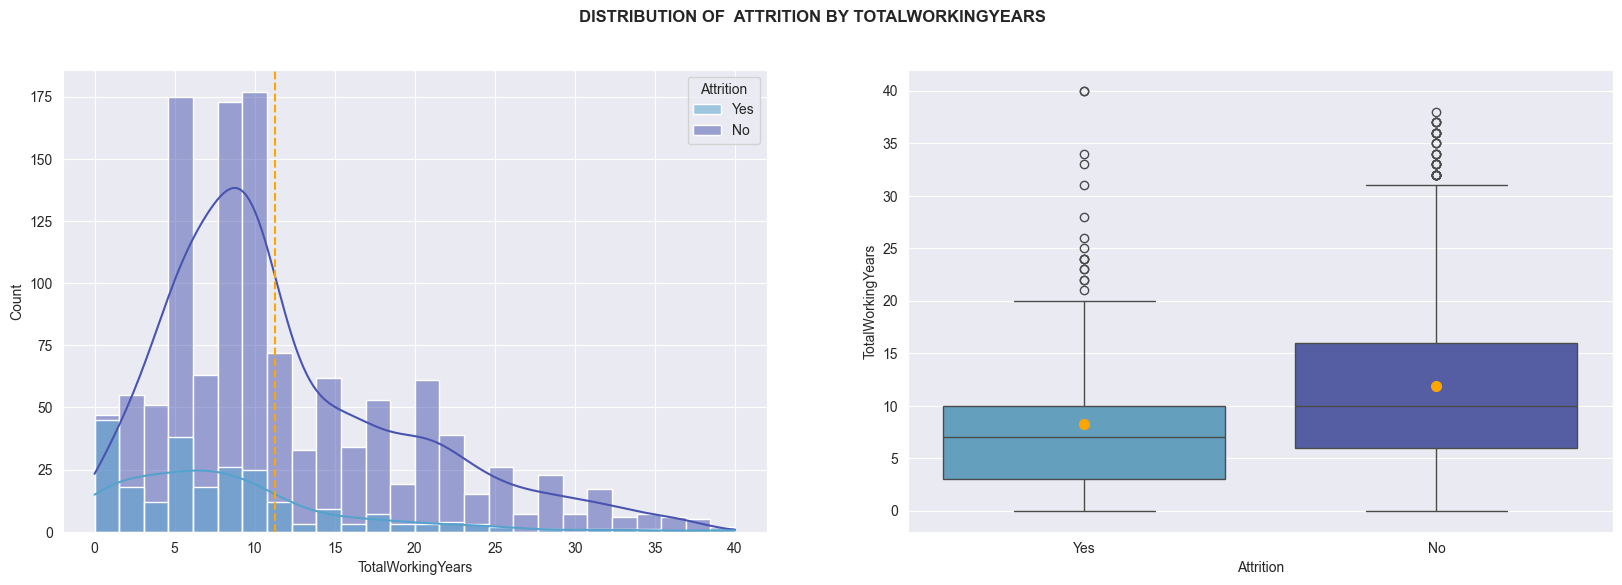

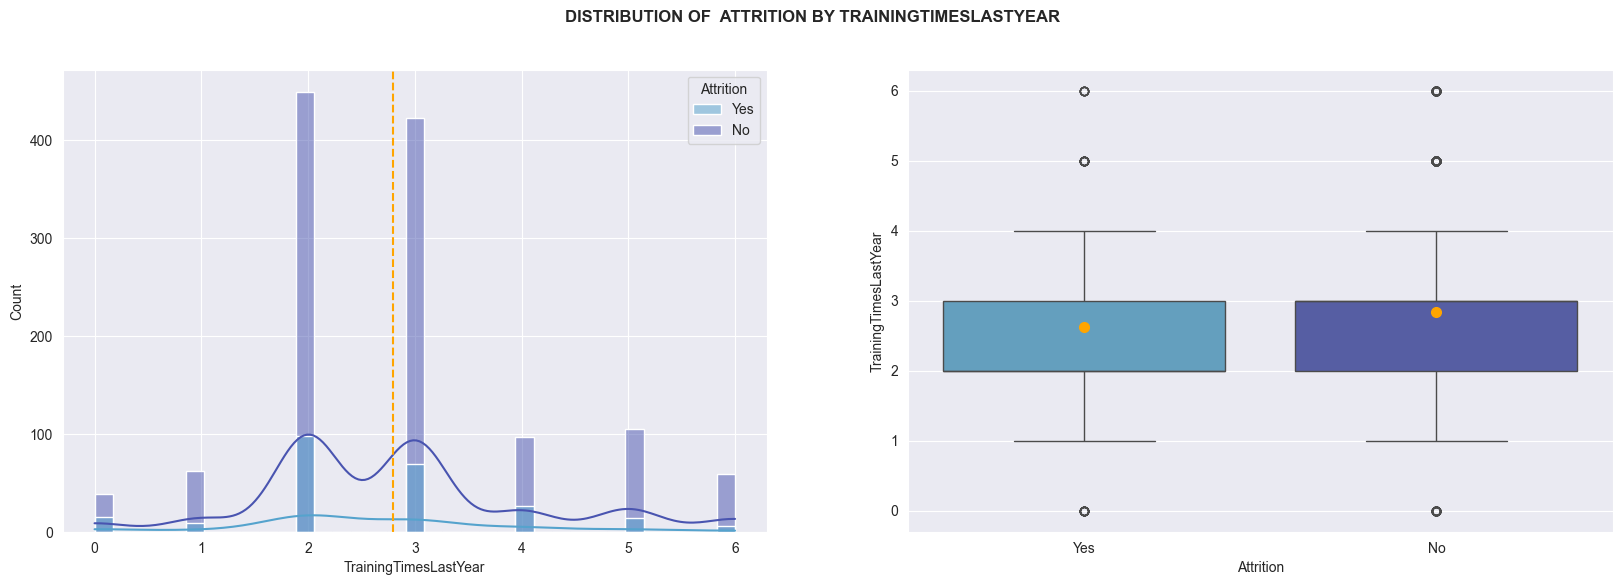

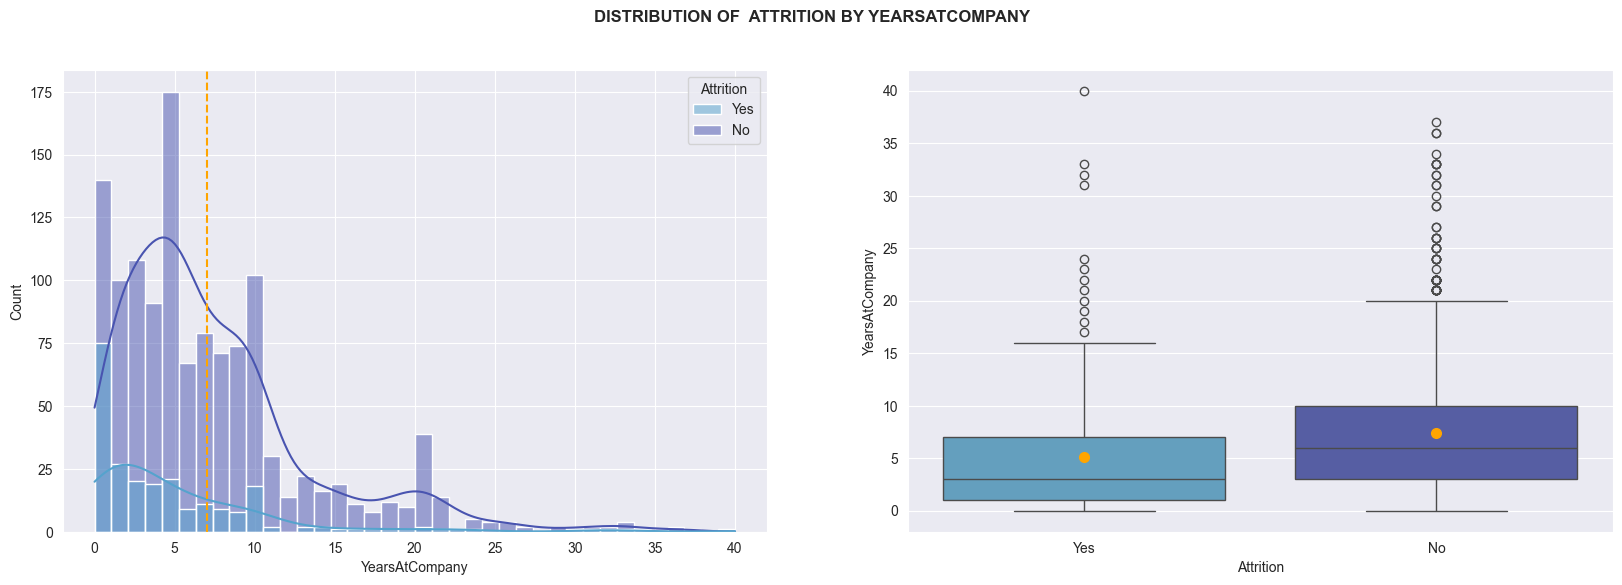

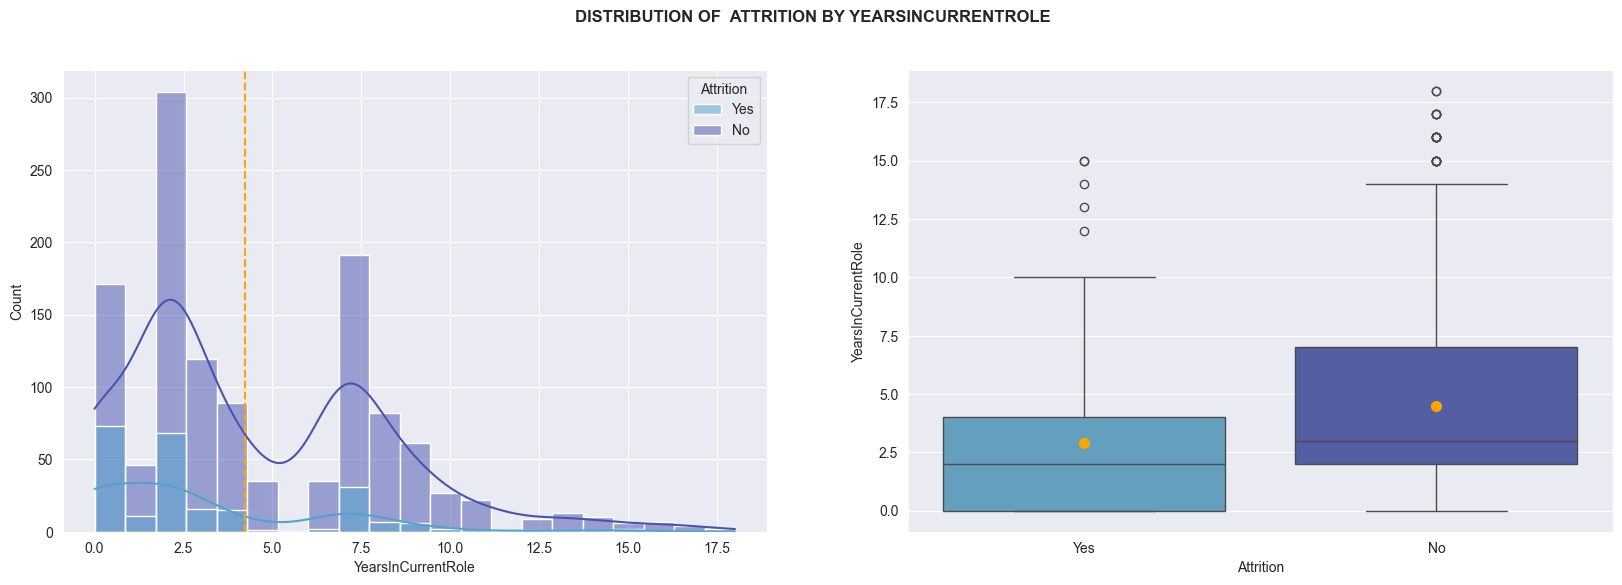

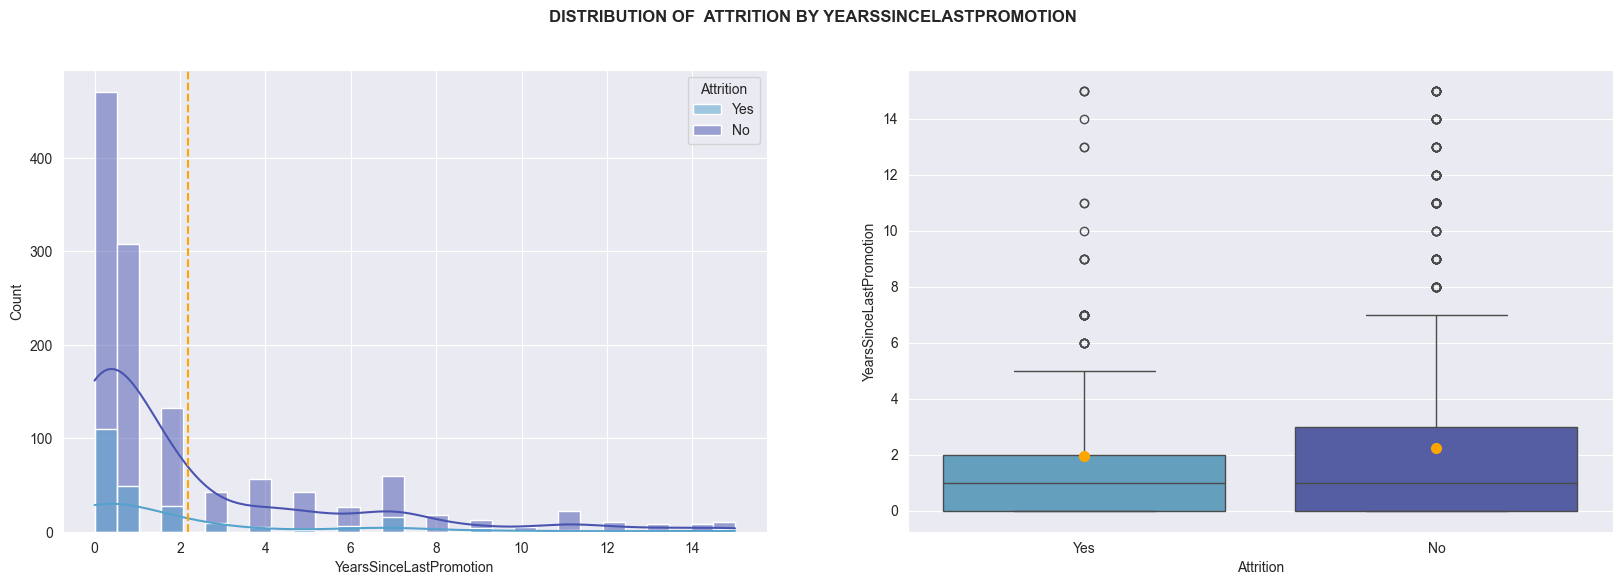

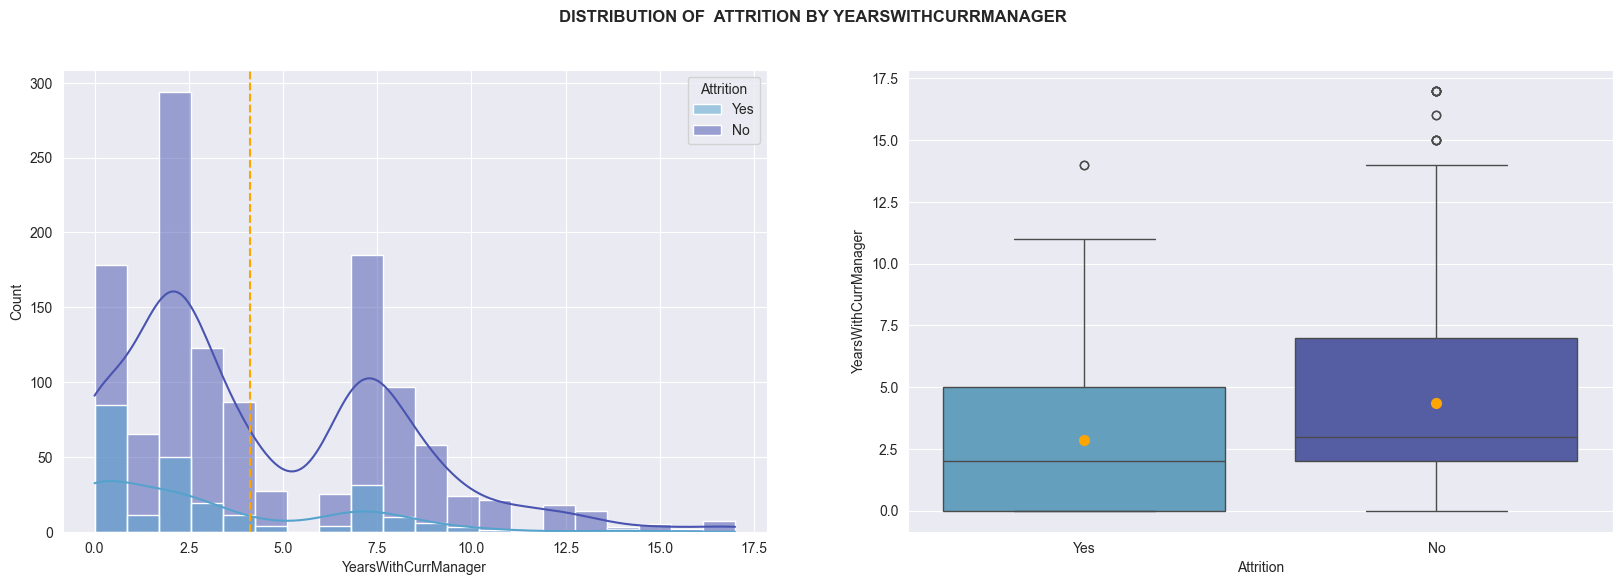

In [33]:
for i in cont_columns:
    cont_plots( DATA , 'Attrition' , i)

From the output, we observe several trends in the distribution of continuous numerical variables with respect to attrition.

For **Daily Rate**, the distributions for both retained and departed employees appear uniformly distributed, with a peak around a daily rate of 200, and no visible outliers in the box plots. **Distance From Home** is left-skewed for both groups, peaking between 0 and 3 kilometers, indicating that most employees live relatively close to their workplace; the box plots show no significant outliers.

The **Hourly Rate** distributions are also uniform, with the highest frequency around \$80 per hour, and no outliers detected. In contrast, **Monthly Income** shows a left-skewed distribution, peaking at approximately \$2,500. Notably, the box plots reveal a substantial number of outliers, particularly among higher earners. **Monthly Rate** is normally distributed, peaking at \$5,000, with no significant outliers.

For **Number of Companies Worked**, the data is left-skewed, peaking between 0 and 2 previous companies, with a few outliers present. **Percentage Salary Hike** also shows a left-skewed distribution, peaking between 0% and 15%, with a small number of outliers. **Total Working Years** exhibits a similar skew, peaking between 5 and 10 years. However, the box plots for attrition reveal outliers, with those who left having total working years between 20 and 40, while those who remained range between 30 and 40 years.

In terms of **Years at Company**, the distribution is left-skewed with a peak between 4 and 5 years, and outliers observed between 15 and 40 years for employees who left, and between 20 and 40 years for those who remained. **Years in Current Role** also follows a left-skewed pattern, peaking between 2 and 3 years, with outliers in the range of 10–15 years for those who left and 15–18 years for those who remained.

**Years Since Last Promotion** is left-skewed, peaking between 0 and 1 year, with outliers ranging from 5 to 15 years among those who left, and from 7 to 15 years for those who stayed. Lastly, **Years with Current Manager** peaks between 2 and 3 years, with outliers extending to 14–17 years, particularly for employees who remained with the company.


In [36]:
 # Binning continous datasets 
bin_columns = [ 'MonthlyIncome' , 'Age' , 'DailyRate' , 'DistanceFromHome' , 'HourlyRate' , 'YearsAtCompany' , 'NumCompaniesWorked' ]

In [37]:
 # Creating functions 
def age_bin(x):
    if x < 25:
        return '<25'
    elif x >= 25 and x < 35:
        return '25-34'
    elif x >= 35 and x < 45:
        return '35-44'
    elif x >= 45 and x < 55:
        return '45-54'
    else:
        return '>55'

def mon_inc_bin(x):
    if x <= 5000:
        return '< 5,000'
    elif x > 5000 and x <= 10000:
        return '5,000 - 10,000'
    else:
        return '>10,000'
      
def day_rt_bin(x):
    if x <= 500:
        return 'below 500'
    elif x > 500 and x <= 1000:
        return '500 - 1000'
    else:
        return ' >1,000'

def hour_rt_bin(x):
    if x <= 40:
        return '<40'
    elif x > 40 and x <= 70:
        return '40 - 70'
    else:
        return '> 70'


def distance_bin(x):
    if x <= 10:
        return '< 10 km'
    elif x > 10 and x <= 20:
        return '10 - 20 km'
    else:
        return '> 20km'

def yr_at_com_bin(x):
    if x <= 2:
        return '< 2 years'
    elif x > 2 and x <= 5:
        return '3 - 5 years'
    elif x > 5 and x <= 12:
        return ' 6 - 12 years'        
    else:
        return '> 12 years'

def num_com_worked(x):
    if x <= 2:
        return '> 2 '
    elif x > 3 and x <= 5:
        return '3 - 5 years'
    else:
        return '> 5 years'

def bin_func( data , val1 ):
    #transforming data 
    if val1 == 'Age':
        data[val1] = data[val1].apply(age_bin)
    elif val1 == 'MonthlyIncome':
        data[val1] = data[val1].apply(mon_inc_bin)
    elif val1 == 'DailyRate':
        data[val1] = data[val1].apply(day_rt_bin)
    elif val1 == 'DistanceFromHome':
        data[val1] = data[val1].apply(distance_bin)
    elif val1 == 'HourlyRate':
        data[val1] = data[val1].apply(hour_rt_bin)
    elif val1 == 'YearsAtCompany':
        data[val1] = data[val1].apply(yr_at_com_bin)
    else:
        data[val1] = data[val1].apply(num_com_worked)

In [38]:
for i in bin_columns:
    bin_func( DATA , i )

MonthlyIncome,"5,000 - 10,000","< 5,000",">10,000"
Attrition,,,
No,391,586,256
Yes,49,163,25


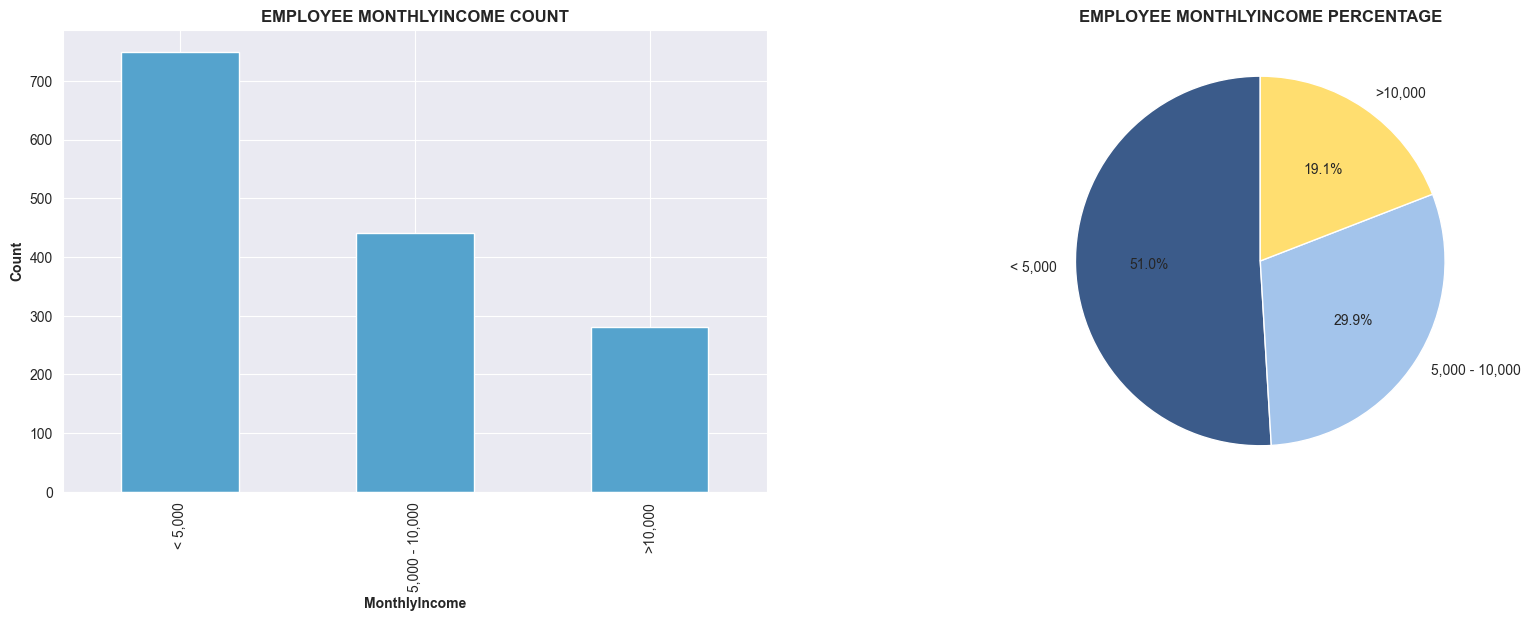

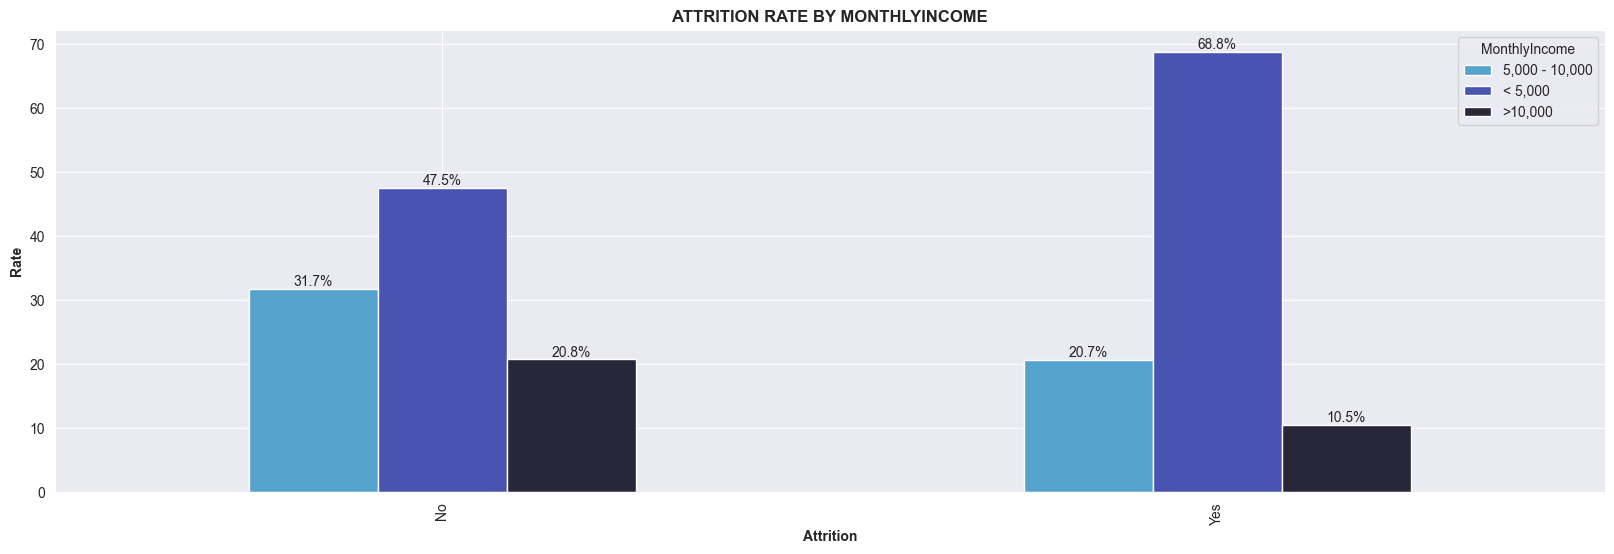

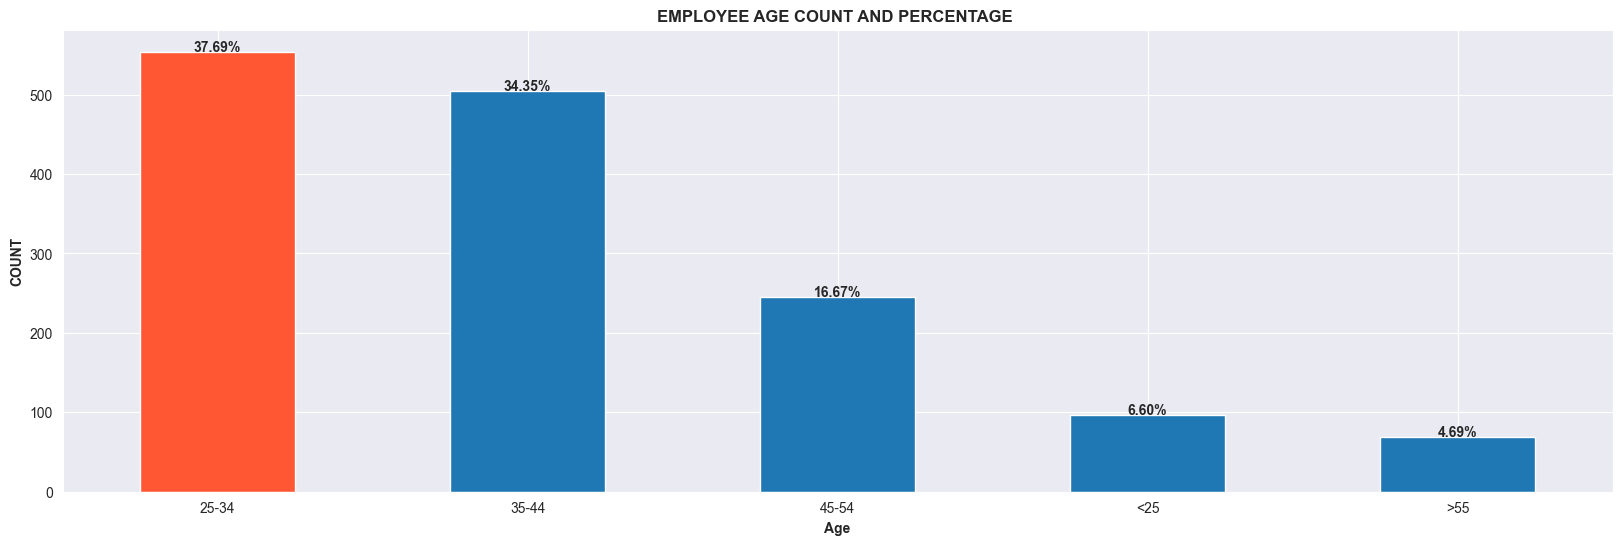

Age,25-34,35-44,45-54,<25,>55
Attrition,,,,,
No,442,454,220,59,58
Yes,112,51,25,38,11


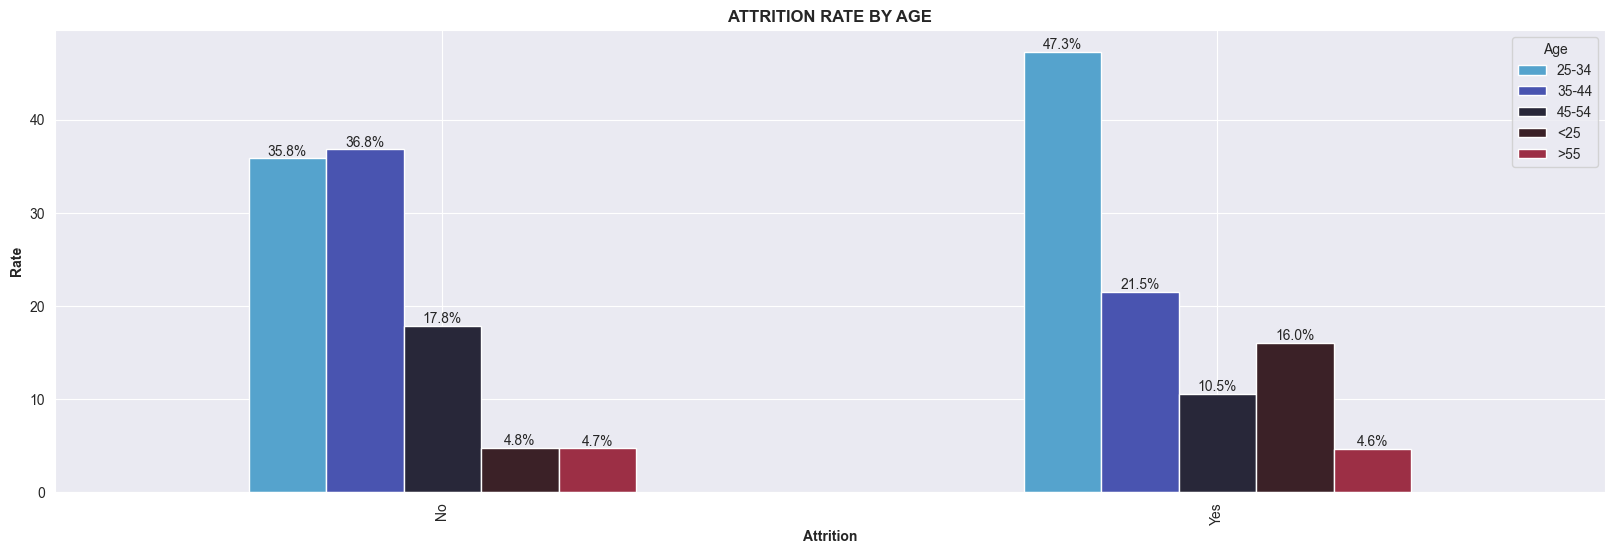

DailyRate,">1,000",500 - 1000,below 500
Attrition,,,
No,452,454,327
Yes,71,88,78


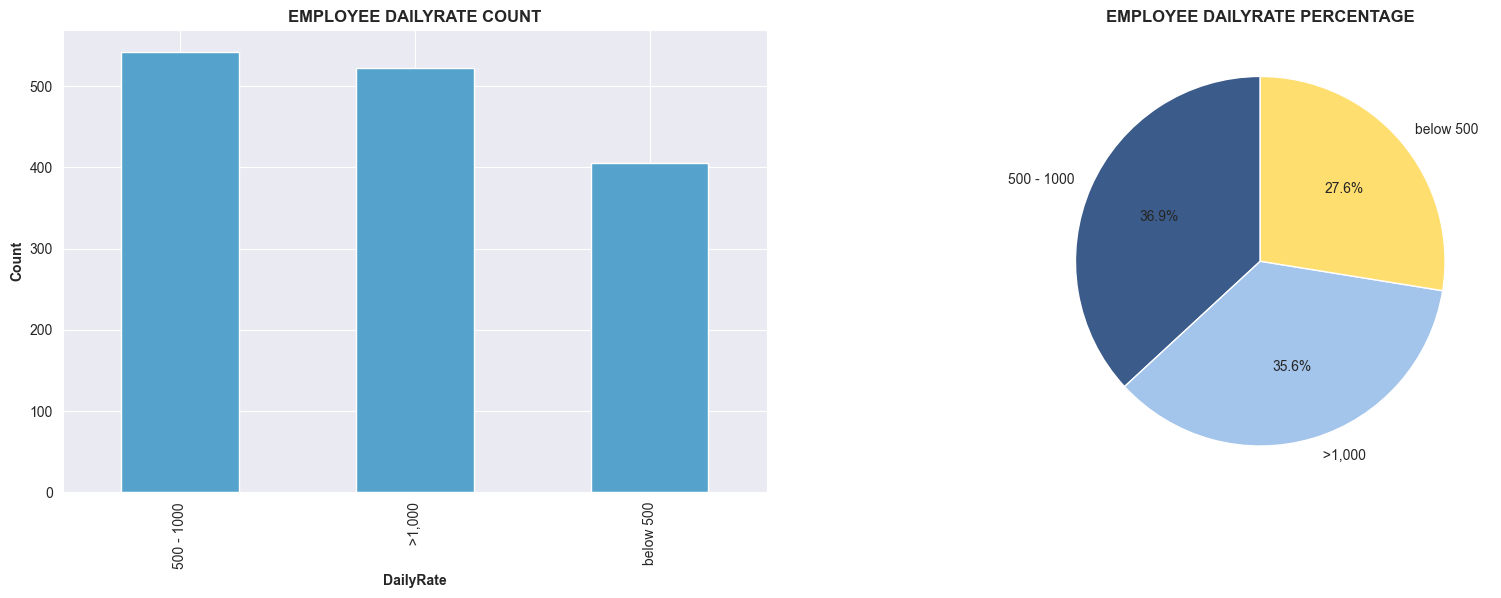

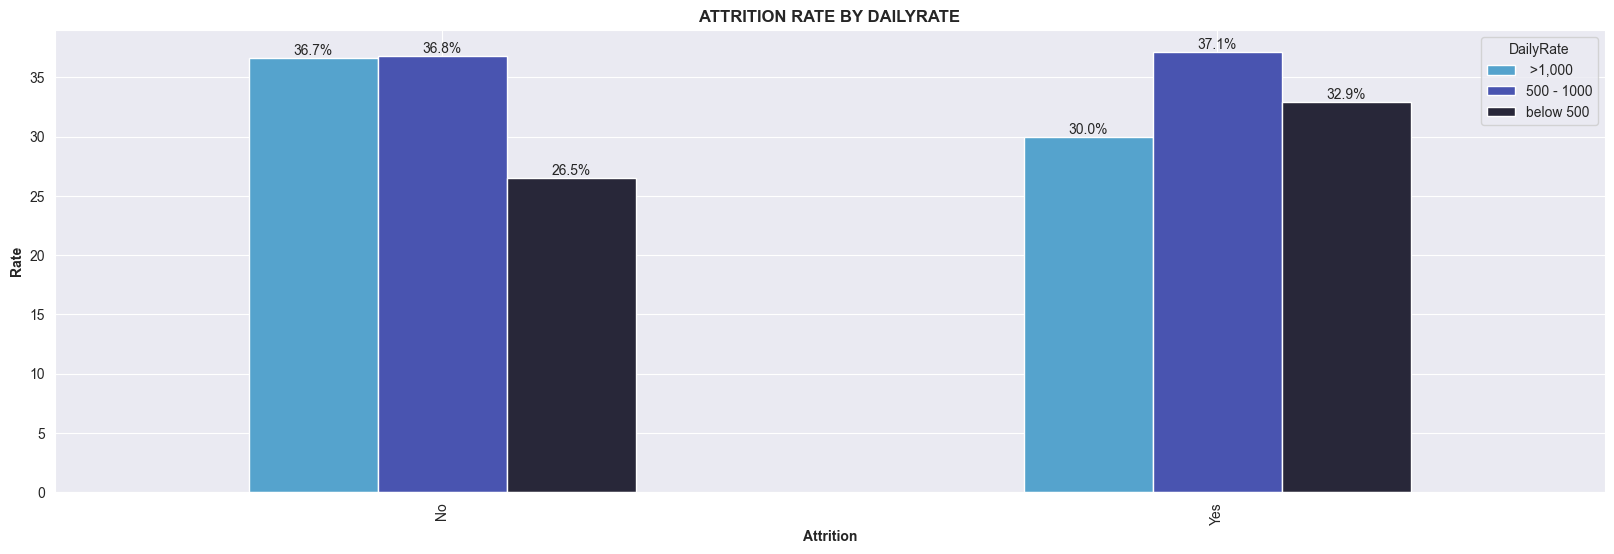

DistanceFromHome,10 - 20 km,< 10 km,> 20km
Attrition,,,
No,192,882,159
Yes,48,144,45


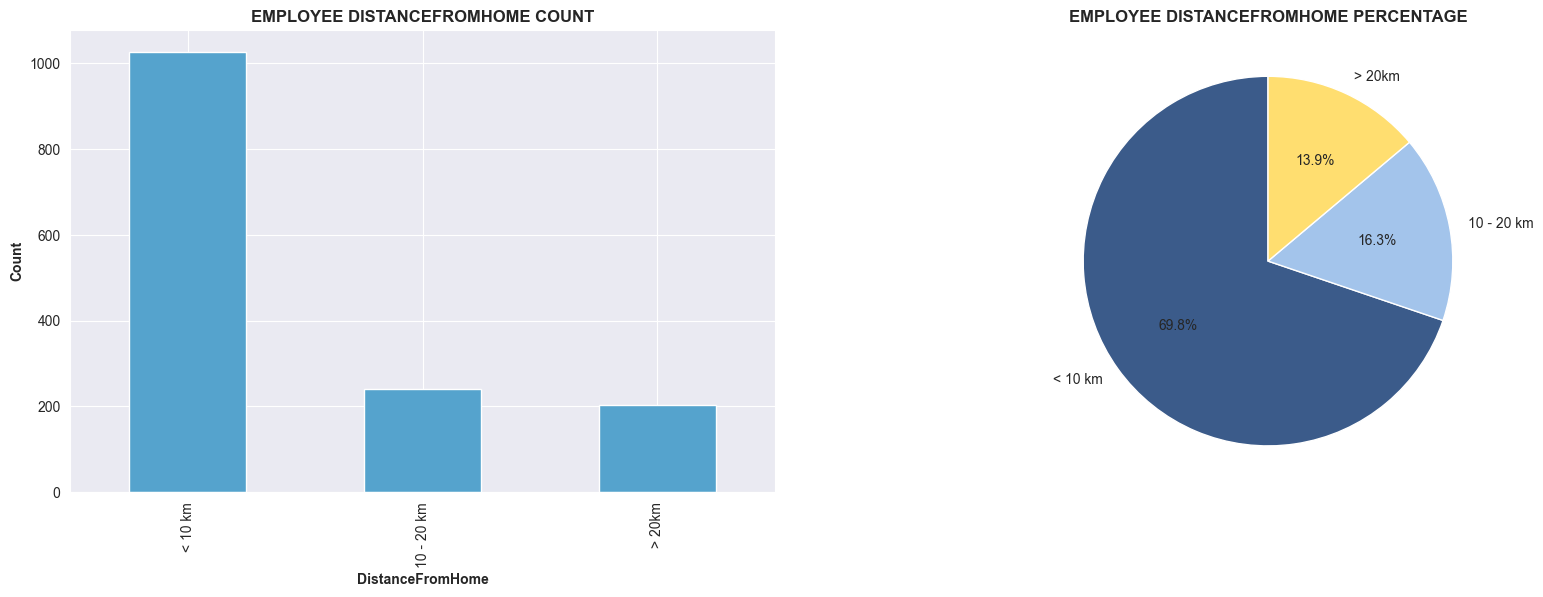

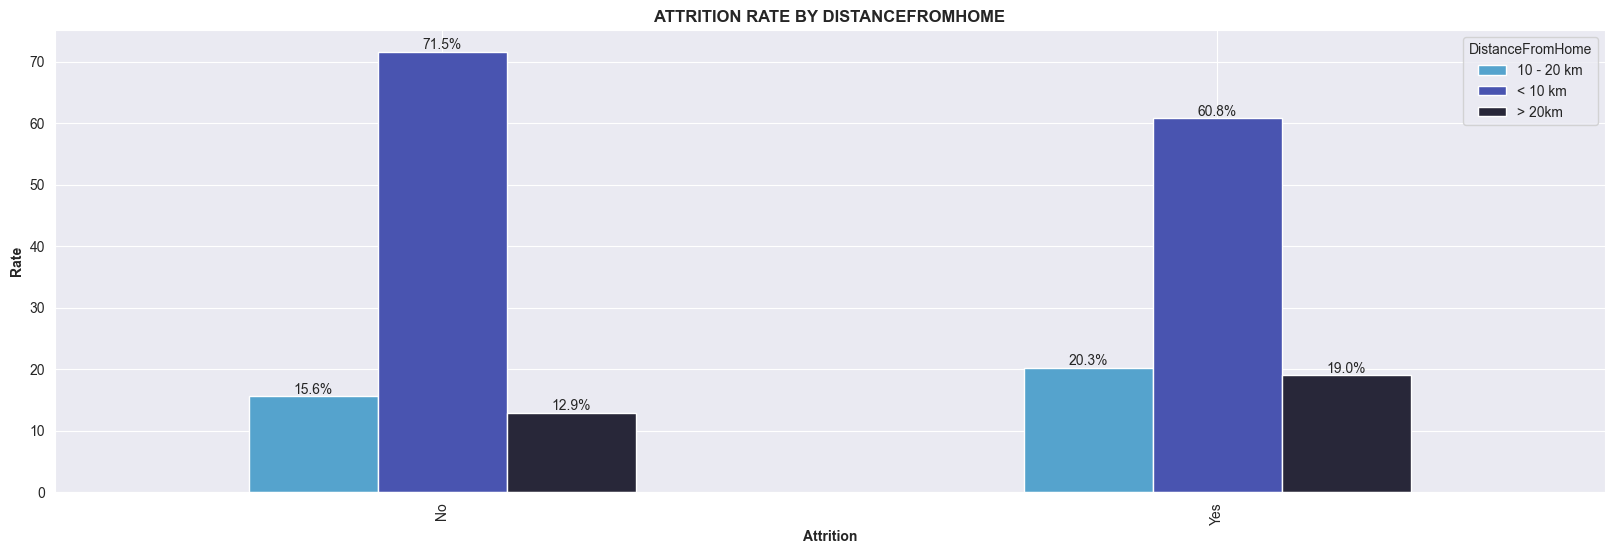

HourlyRate,40 - 70,<40,> 70
Attrition,,,
No,519,158,556
Yes,107,33,97


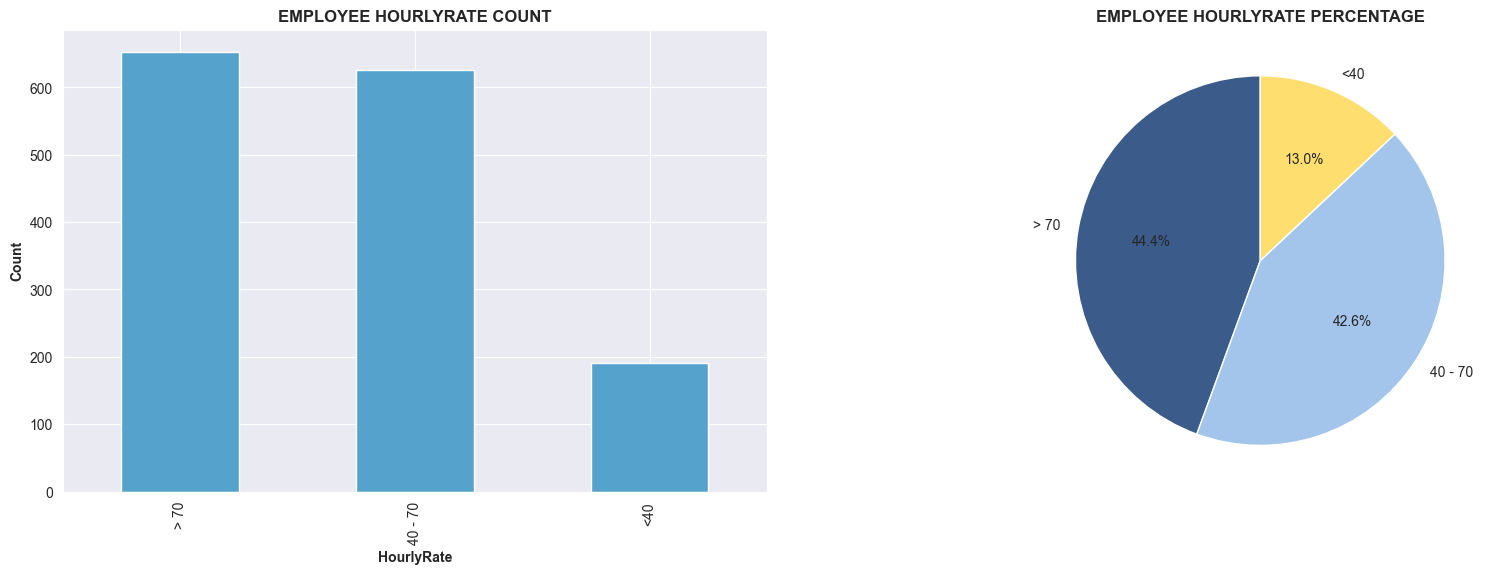

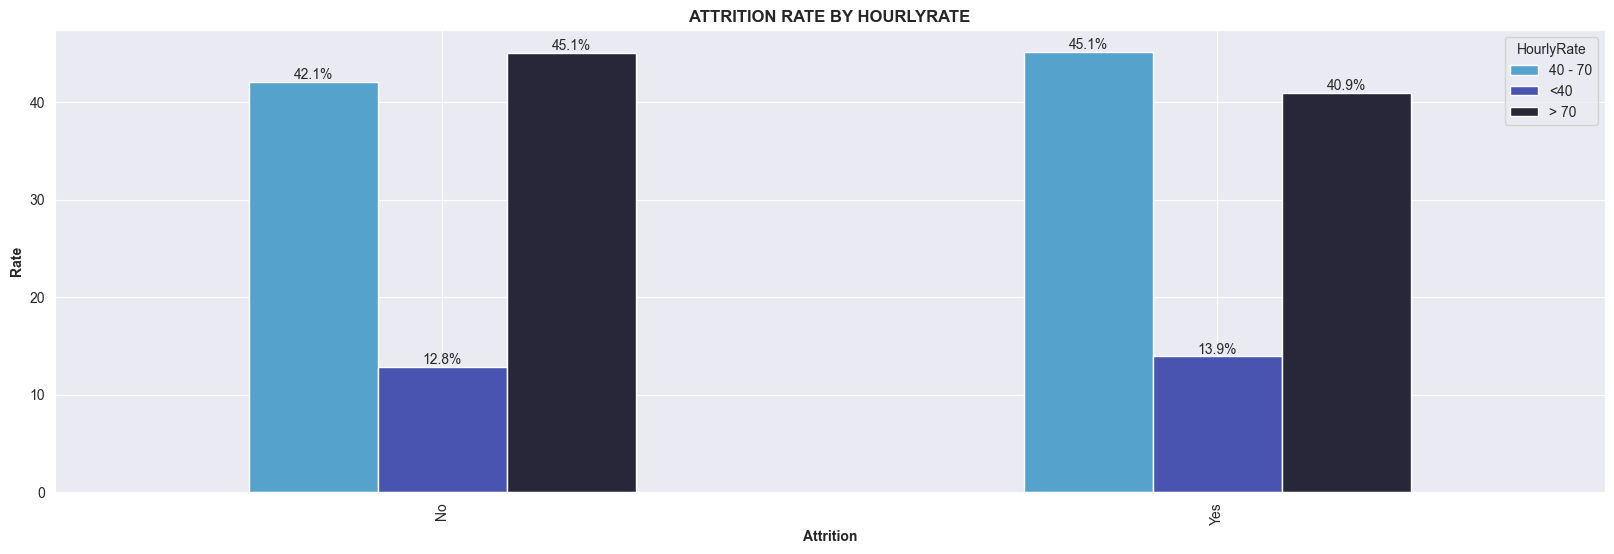

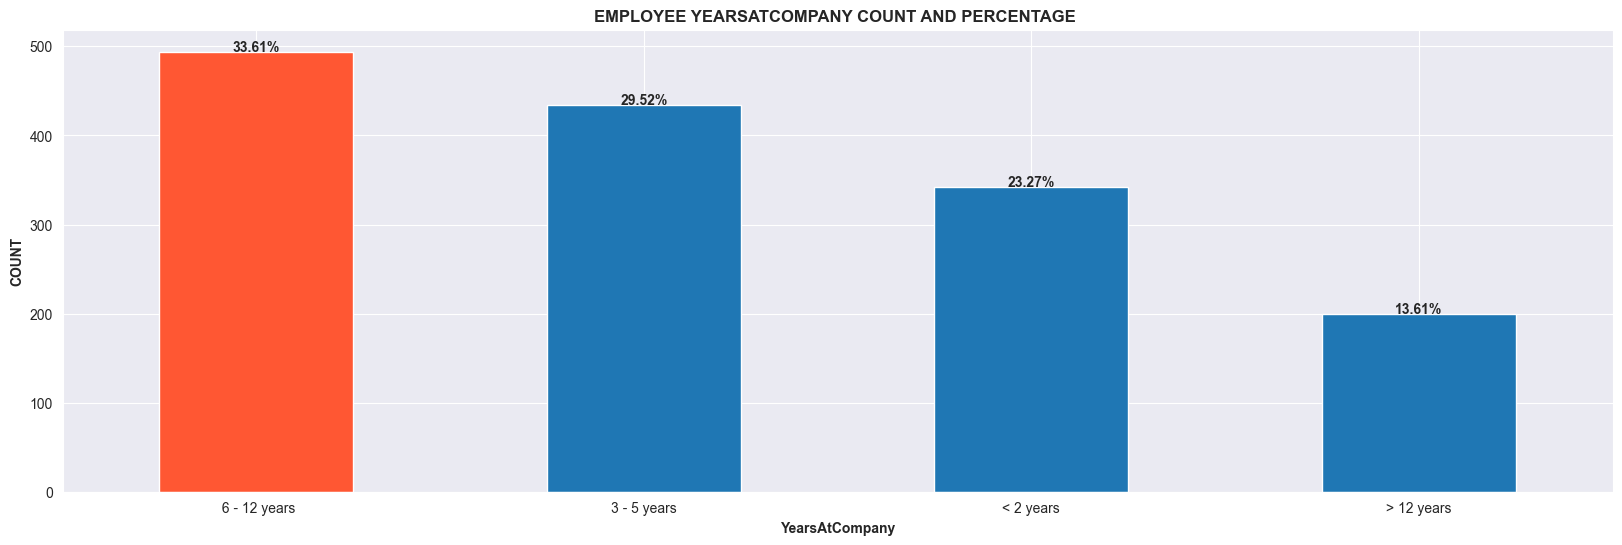

YearsAtCompany,6 - 12 years,3 - 5 years,< 2 years,> 12 years
Attrition,,,,
No,437,374,240,182
Yes,57,60,102,18


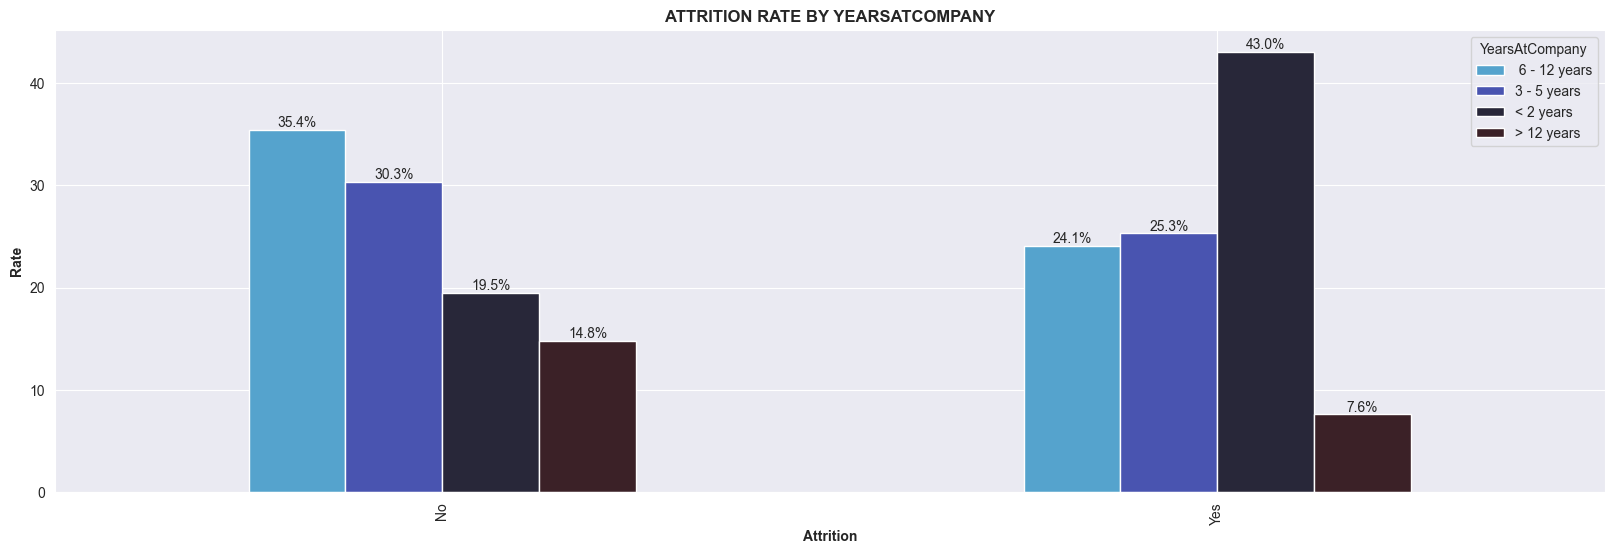

NumCompaniesWorked,3 - 5 years,> 2,> 5 years
Attrition,,,
No,169,727,337
Yes,33,137,67


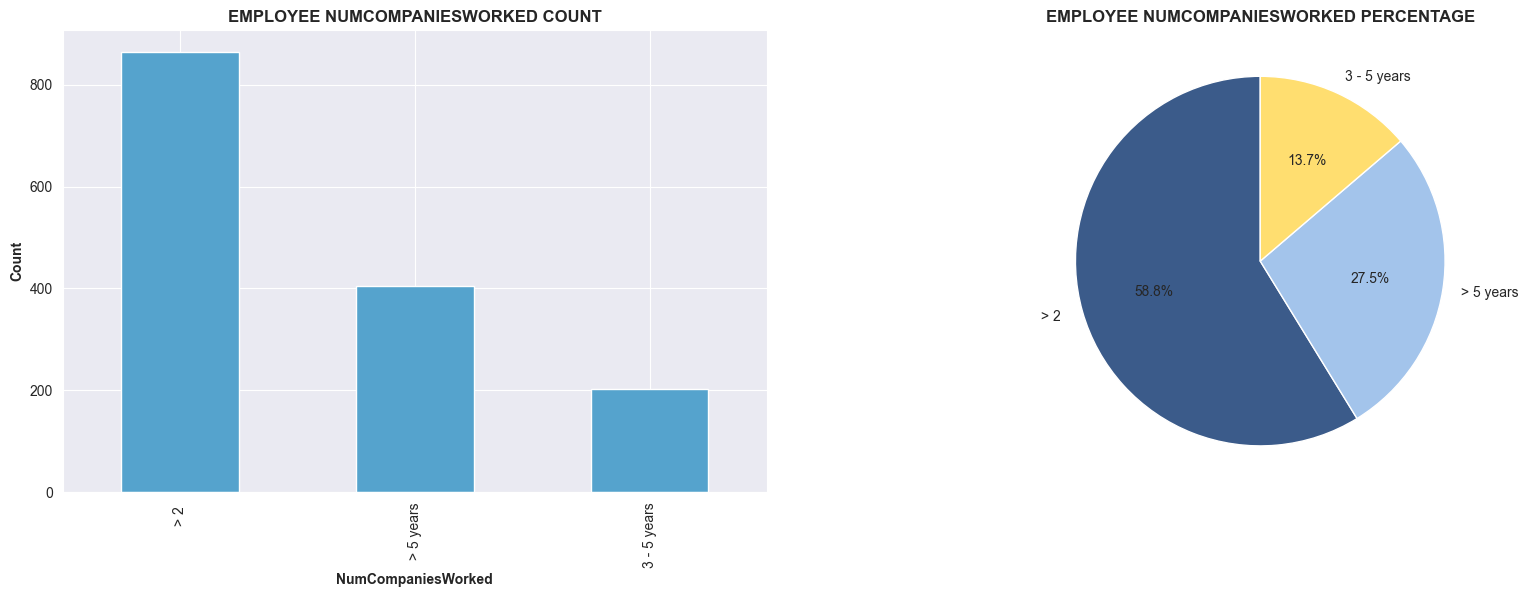

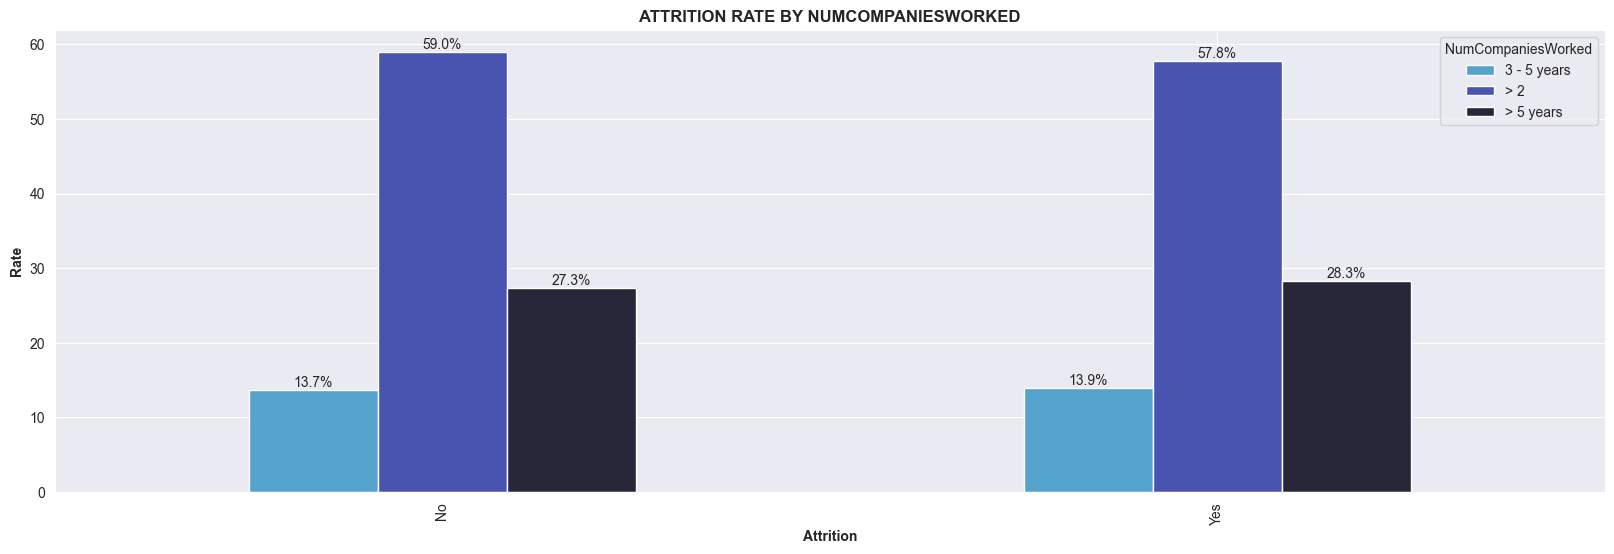

In [39]:
for i in bin_columns:
     # Plotting
    plots( DATA , i)
    cat_plot( DATA , 'Attrition' , i )

* **Monthly Income**:

  * 51% of employees earn **below \$5,000**.
  * Only 19.1% of employees earn **above \$10,000**.
  * Employees earning **above \$10,000** have the **lowest attrition rate** at **10.5%**.
  * Employees earning **between \$5,000 and \$10,000** have the **highest attrition rate** at **68.8%**.

* **Age Distribution**:

  * 36.9% of employees are between the ages of **25-34**.
  * Employees aged **25–34** have the **highest attrition rate** at **47.3%**.
  * Employees **over 55 years** have the **lowest attrition rate** at **4.6%**.

* **Daily Rate**:

  * Employees with a **daily rate between \$500–\$1000** have the **highest attrition rate** at **37.1%**.

* **Hourly Rate**:

  * Employees with an **hourly rate between \$40–\$70** have the **highest attrition rate** at **45.1%**.

* **Tenure (Years at Company)**:

  * Employees who have been with the company for **less than 2 years** have the **highest attrition rate** at **43.0%**.
  * Employees with **more than 12 years** at the company have the **lowest attrition rate** at **7.6%**.


In [41]:
 # Saving the data into csv
DATA.to_csv('CLEANED_DATA.csv', index=False)